In [ ]:
!pip -q install mat73
!pip -q install geopandas
!pip -q install geojson

In [ ]:
import os
import mat73
import geojson
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [ ]:
base_path = '/content/drive/MyDrive/SeonwooKim GSoC 2022/4_DataBases/newExtract/'

In [ ]:
ds1_path, ds2_path, ds3_path, ds4_path, ds5_path, ds6_path, ds7_path, ds8_path, cd_path, cs_path = [os.path.join(base_path, ds_path) for ds_path in os.listdir(base_path)]

In [ ]:
all_ds_path = [ds1_path, ds2_path, ds3_path, ds4_path, ds5_path, ds6_path, ds7_path, ds8_path, cd_path, cs_path]
all_ds_path = all_ds_path[:6] + all_ds_path[8:]
all_ds_path

['/content/drive/MyDrive/SeonwooKim GSoC 2022/4_DataBases/newExtract/cleanStatic',
 '/content/drive/MyDrive/SeonwooKim GSoC 2022/4_DataBases/newExtract/cleanDynamic',
 '/content/drive/MyDrive/SeonwooKim GSoC 2022/4_DataBases/newExtract/ds1',
 '/content/drive/MyDrive/SeonwooKim GSoC 2022/4_DataBases/newExtract/ds2',
 '/content/drive/MyDrive/SeonwooKim GSoC 2022/4_DataBases/newExtract/ds3',
 '/content/drive/MyDrive/SeonwooKim GSoC 2022/4_DataBases/newExtract/ds4',
 '/content/drive/MyDrive/SeonwooKim GSoC 2022/4_DataBases/newExtract/ds7',
 '/content/drive/MyDrive/SeonwooKim GSoC 2022/4_DataBases/newExtract/ds8']

# PVT

In [ ]:
for folder in all_ds_path:
  fname = [f for f in os.listdir(folder) if "geojson" in f][0]
  f_path = os.path.join(folder, fname)
  key = folder.split('/')[-1]
  with open(f_path) as f:
    globals()[f'{key}_pvt'] = np.array(geojson.load(f)['geometry']['coordinates'])

In [ ]:
len(cleanStatic_pvt), len(ds1_pvt), len(ds2_pvt), len(ds3_pvt), len(ds4_pvt), len(ds7_pvt), len(ds8_pvt)

(440, 425, 420, 341, 91, 431, 431)

In [ ]:
coordiates = ['Longitude', 'Latitude', 'Altitue']

def compare_pvt(dataset, clean):
  fig, ax = plt.subplots(3, 1, figsize=(8,8))
  fig.suptitle(f"PVT comparison of {dataset} & clean", y=1.05, fontsize=20)

  clean_pvt = cleanStatic_pvt if clean == 'static' else cleanDynamic_pvt

  for i in range(3):
    ax[i].title.set_text(coordiates[i])
    ax[i].plot(clean_pvt[:,i], 'b--', alpha=0.6)
    exec(f"ax[i].plot({dataset}_pvt[:,i], 'r-', alpha=0.8)")
    if i != 2: ax[i].set_ylabel('Degree') 
    else: ax[i].set_ylabel('meter')

  ax[2].set_xlabel('time (s)')
  
  fig.tight_layout()

  legend_elements = [Line2D([0], [0], color='r', lw=4, label='Spoofed Dataset'),
                    Line2D([0], [0], color='b', lw=4, label='Clean Dataset')]
  fig.legend(handles=legend_elements, loc=(0.32,0), prop={'size': 10}, ncol=2, frameon=False)

  plt.savefig(f"{dataset}_pvt.png")
  plt.show()

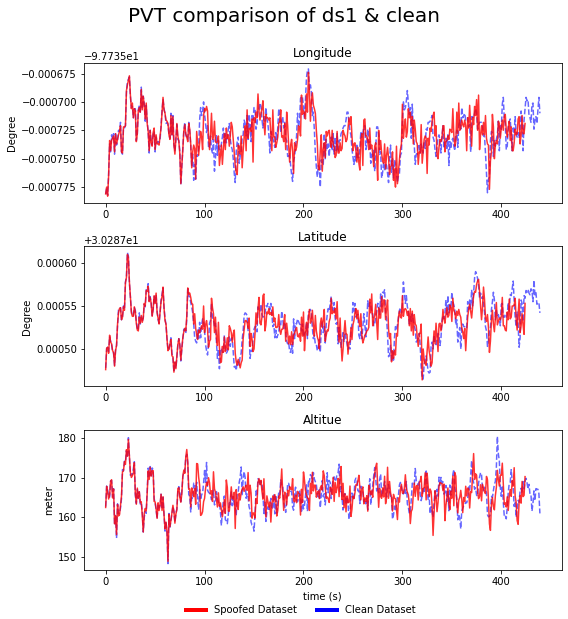

In [ ]:
compare_pvt('ds1', 'static')

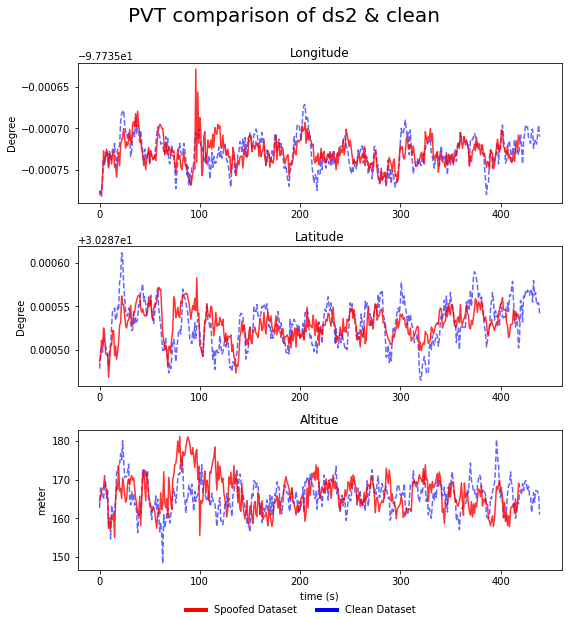

In [ ]:
compare_pvt('ds2', 'static')

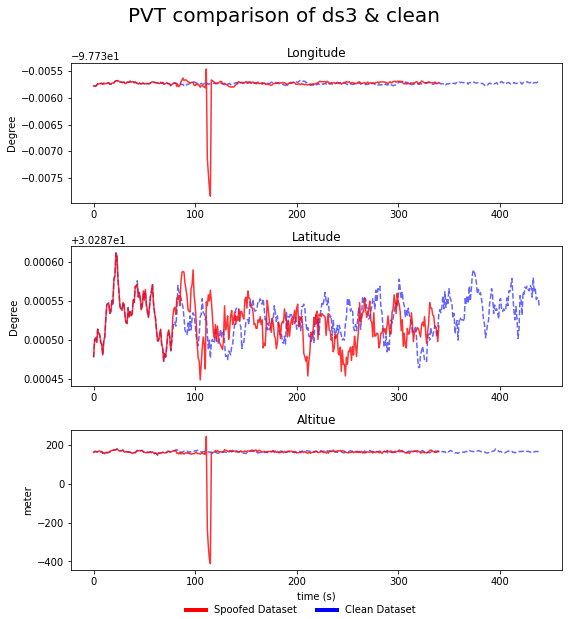

In [ ]:
compare_pvt('ds3', 'static')

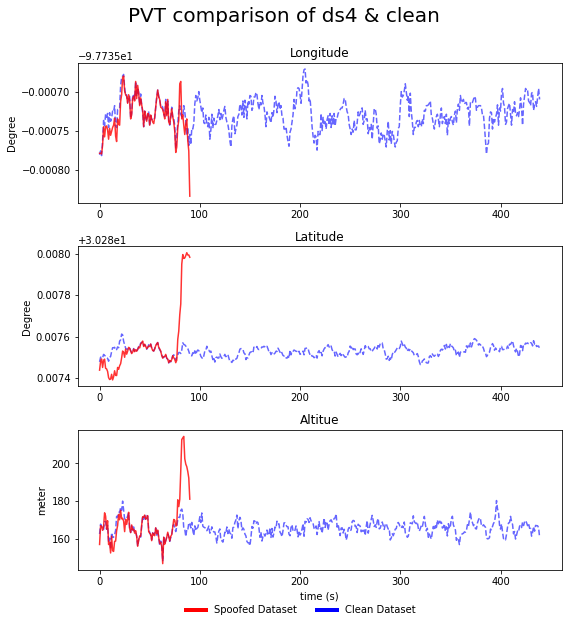

In [ ]:
compare_pvt('ds4', 'static')

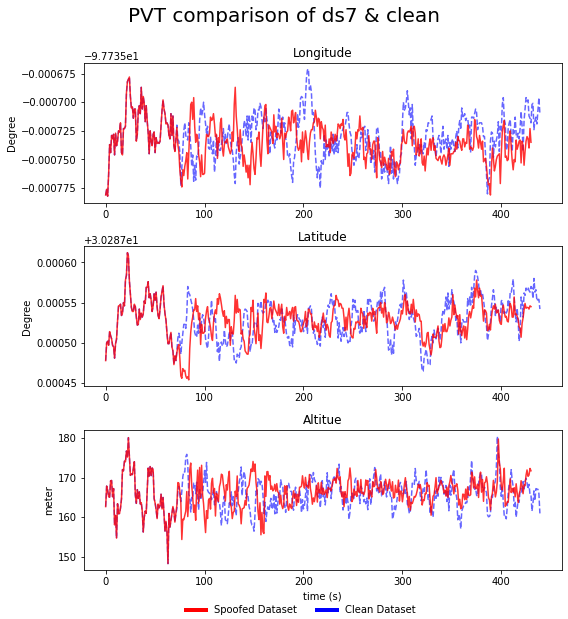

In [ ]:
compare_pvt('ds7', 'static')

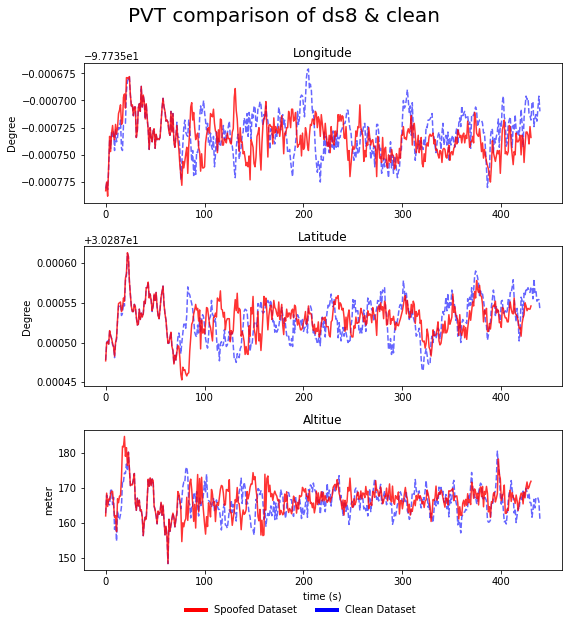

In [ ]:
compare_pvt('ds8', 'static')

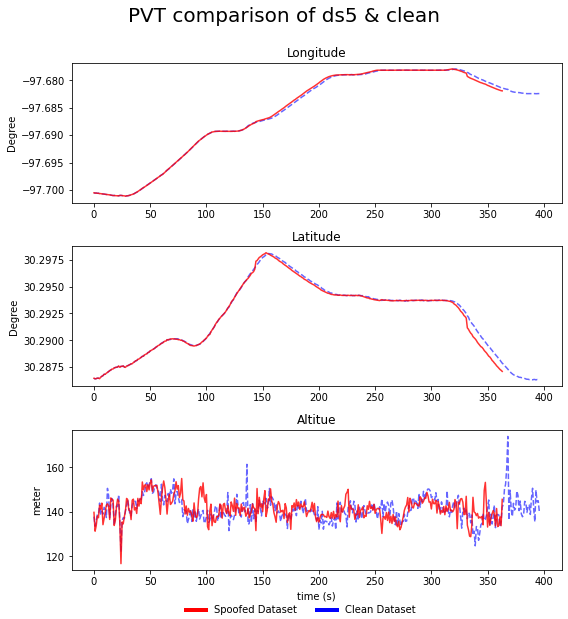

In [ ]:
compare_pvt('ds5', 'dynamic')

# Data

## Preparation

In [ ]:
def allocate_matfile(path):
  prepend = path.split('/')[-1]
  for i in range(8):
    globals()[f'{prepend}_trk{i}_mat'] = mat73.loadmat(os.path.join(path, f'tracking_ch_{i}.mat'))
  globals()[f'{prepend}_obs_mat'] = mat73.loadmat(os.path.join(path, 'observables.mat'))

In [ ]:
for ds_path in all_ds_path:
  allocate_matfile(ds_path)

In [ ]:
print(ds1_obs_mat.keys())
print(ds1_trk0_mat.keys())

dict_keys(['Carrier_Doppler_hz', 'Carrier_phase_cycles', 'Flag_valid_pseudorange', 'PRN', 'Pseudorange_m', 'RX_time', 'TOW_at_current_symbol_s'])
dict_keys(['CN0_SNV_dB_Hz', 'PRN', 'PRN_start_sample_count', 'Prompt_I', 'Prompt_Q', 'abs_E', 'abs_L', 'abs_P', 'abs_VE', 'abs_VL', 'acc_carrier_phase_rad', 'aux1', 'aux2', 'carr_error_filt_hz', 'carr_error_hz', 'carrier_doppler_hz', 'carrier_doppler_rate_hz', 'carrier_lock_test', 'code_error_chips', 'code_error_filt_chips', 'code_freq_chips', 'code_freq_rate_chips'])


In [ ]:
obs_keys = ds1_obs_mat.keys()
trk_keys = ds1_trk0_mat.keys()
static_ds = ['ds1', 'ds2', 'ds3', 'ds4', 'ds7', 'ds8']
prn_dict = {
    'inorder' : [3, 6, 7, 13, 16, 19, 23],
    'cleanStatic' : [0, 7, 4, 5, 3, 2, 1],
    'ds1' : [2, 1, 3, 5, 7, 4, 6],
    'ds2' : [6, 1, 5, 3, 0, 4, 7],
    'ds3' : [4, 6, 5, 7, 0, 2, 1],
    'ds4' : [6, 3, 5, 1, 2, 7, 0],
    'ds7' : [2, 5, 6, 0, 7, 4, 1],
    'ds8' : [0, 6, 3, 1, 7, 5, 2]
}

In [ ]:
def get_prn_idx(dataset, prn_num):
  return prn_dict[dataset][prn_dict['inorder'].index(prn_num)]

def compare_plot(dataset, prn_num, key):
  ds_prn_idx = get_prn_idx(dataset, prn_num)
  clean_prn_idx = get_prn_idx('cleanStatic', prn_num)

  plt.figure(figsize=(10,5))

  if key in obs_keys:
    exec(f"plt.plot({dataset}_obs_mat[key][ds_prn_idx], 'r-', alpha=0.5)")
    exec(f"plt.plot(cleanStatic_obs_mat[key][clean_prn_idx], 'b-', alpha=0.5)")
  elif key in trk_keys:
    exec(f"plt.plot({dataset}_trk{ds_prn_idx}_mat[key], 'r-', alpha=0.5)")
    exec(f"plt.plot(cleanStatic_trk{clean_prn_idx}_mat[key], 'b-', alpha=0.5)")

def compare_plot_all(dataset, key, yaxis):
  fig, ax = plt.subplots(2, 4, figsize=(20,7))
  fig.suptitle(f"{key} in {dataset}", y=1.05, fontsize=25)
  for idx, prn_num in enumerate(prn_dict['inorder']):
    ds_prn_idx = get_prn_idx(dataset, prn_num)
    clean_prn_idx = get_prn_idx('cleanStatic', prn_num)

    row = idx // 4
    col = idx % 4

    ax[row, col].title.set_text(f"PRN : {prn_num}")


    if key in obs_keys:
      exec(f"ax[row, col].plot({dataset}_obs_mat[key][ds_prn_idx], 'r-', alpha=0.8)")
      exec(f"ax[row, col].plot(cleanStatic_obs_mat[key][clean_prn_idx], 'b--', alpha=0.8, linewidth=1.5)")
    elif key in trk_keys:
      exec(f"ax[row, col].plot({dataset}_trk{ds_prn_idx}_mat[key], 'r-', alpha=0.8)")
      exec(f"ax[row, col].plot(cleanStatic_trk{clean_prn_idx}_mat[key], 'b--', alpha=0.8, linewidth=1.5)")
    ax[row, col].set_xlabel('time (ms)')
    ax[row, col].set_ylabel(yaxis)
  fig.delaxes(ax[1, 3])
  fig.tight_layout()

  legend_elements = [Line2D([0], [0], color='b', lw=4, label='Line'),
                    Line2D([0], [0], marker='o', color='w', label='Scatter',
                            markerfacecolor='g', markersize=15),
                    Patch(facecolor='orange', edgecolor='r',
                          label='Color Patch')]

  legend_elements = [Line2D([0], [0], color='r', lw=4, label='Spoofed Dataset'),
                    Line2D([0], [0], color='b', lw=4, label='Clean Dataset')]
  fig.legend(handles=legend_elements, loc='lower right', prop={'size': 20})
  plt.savefig(f"{key}_{dataset}.png")
  # plt.show()

## Observables

### Carrier_Doppler_hz

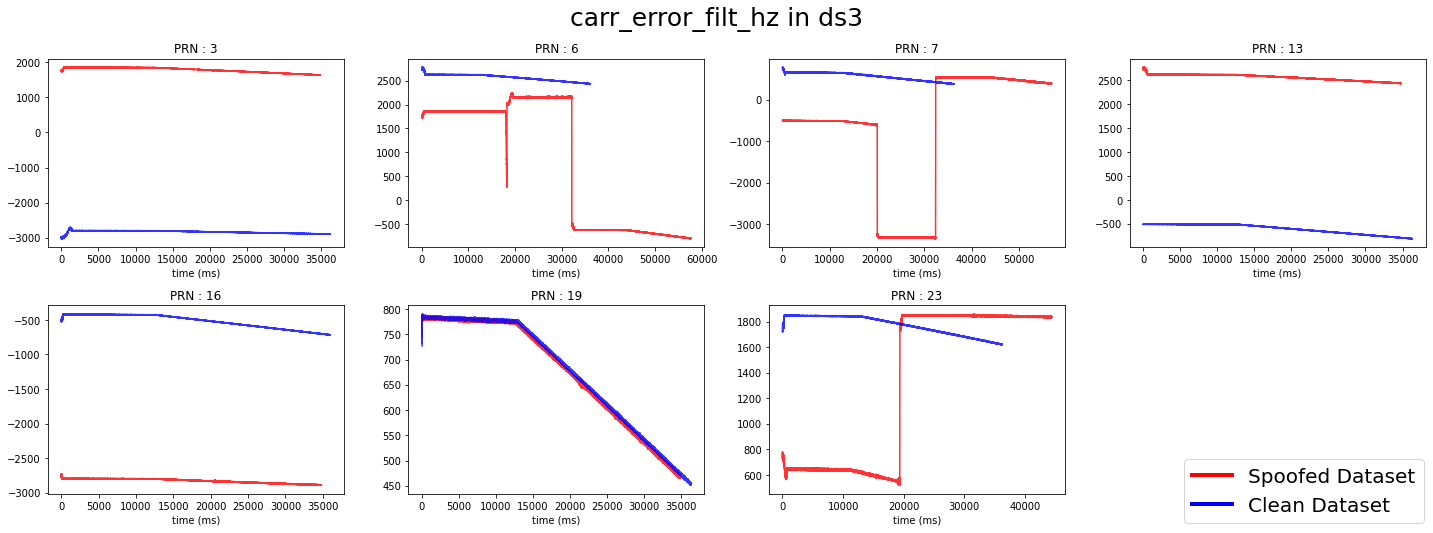

In [ ]:
compare_plot_all('ds3', 'carr_error_filt_hz', '')

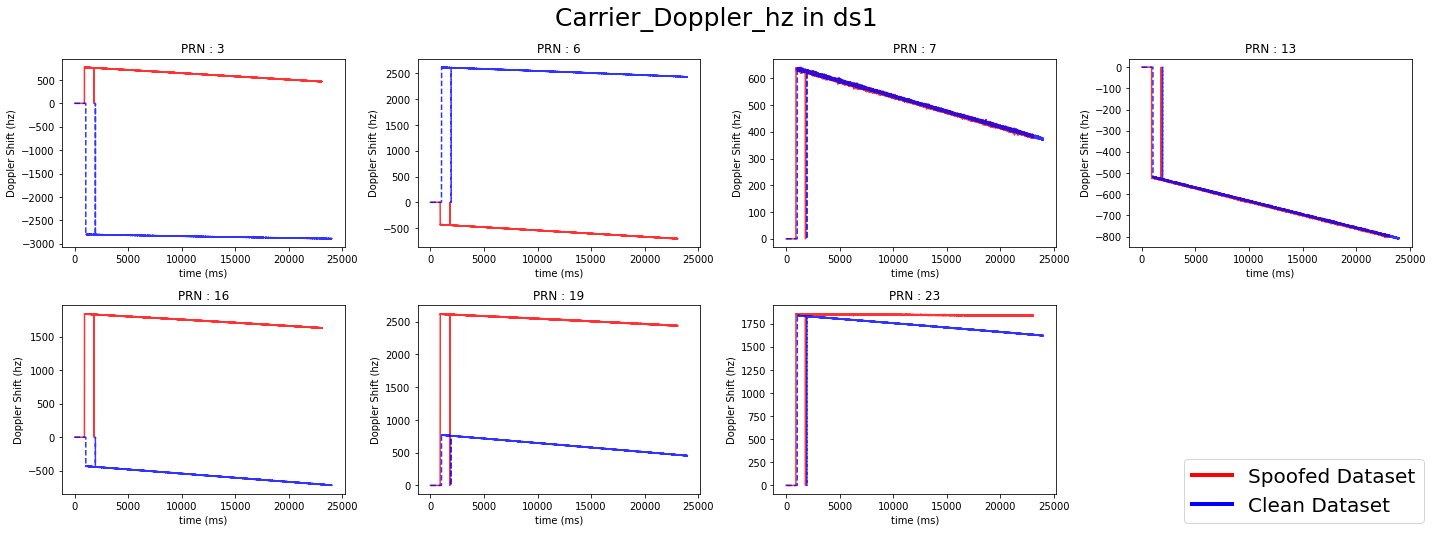

In [ ]:
compare_plot_all('ds1', 'Carrier_Doppler_hz', 'Doppler Shift (hz)')

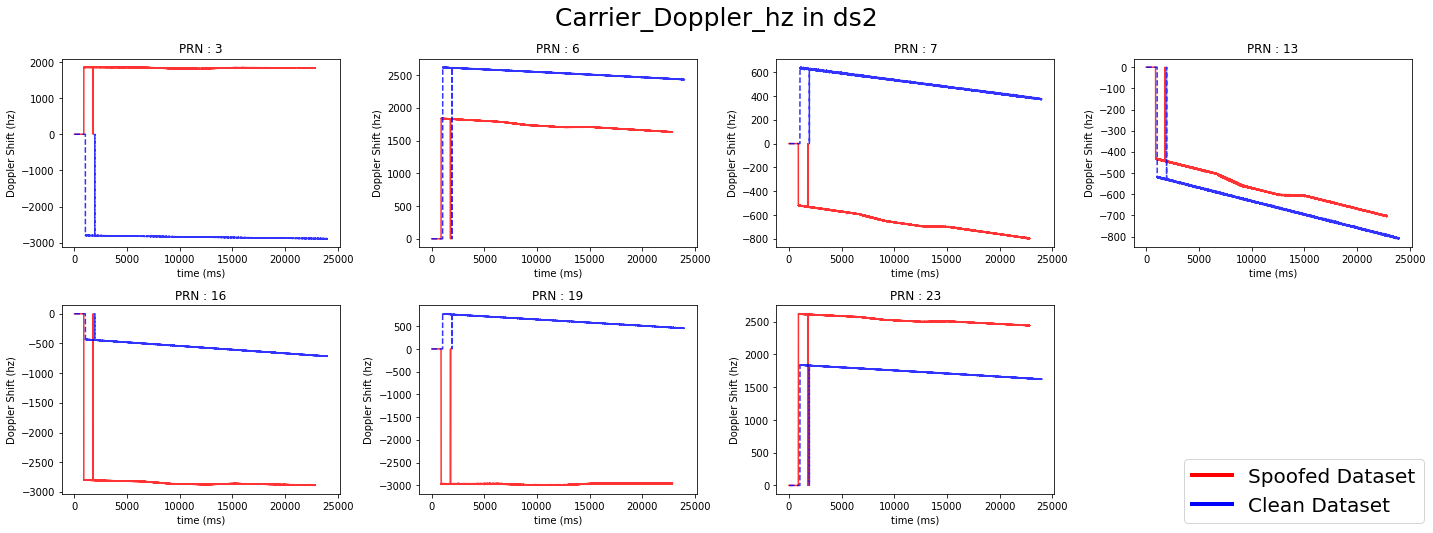

In [ ]:
compare_plot_all('ds2', 'Carrier_Doppler_hz', 'Doppler Shift (hz)')

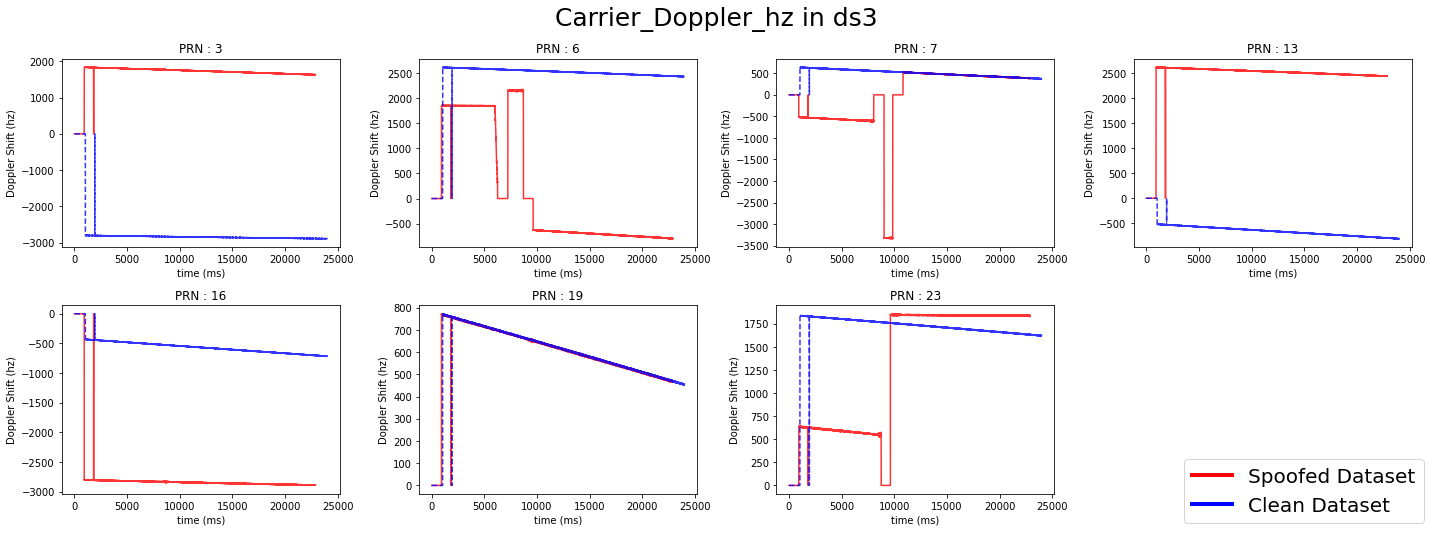

In [ ]:
compare_plot_all('ds3', 'Carrier_Doppler_hz', 'Doppler Shift (hz)')

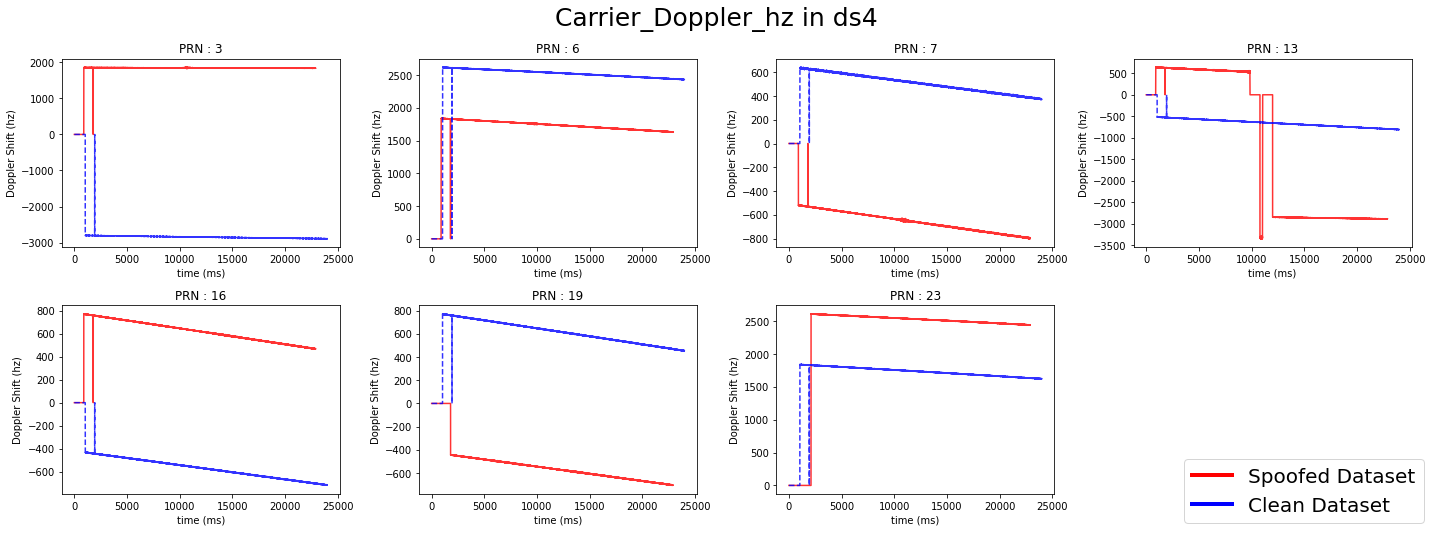

In [ ]:
compare_plot_all('ds4', 'Carrier_Doppler_hz', 'Doppler Shift (hz)')

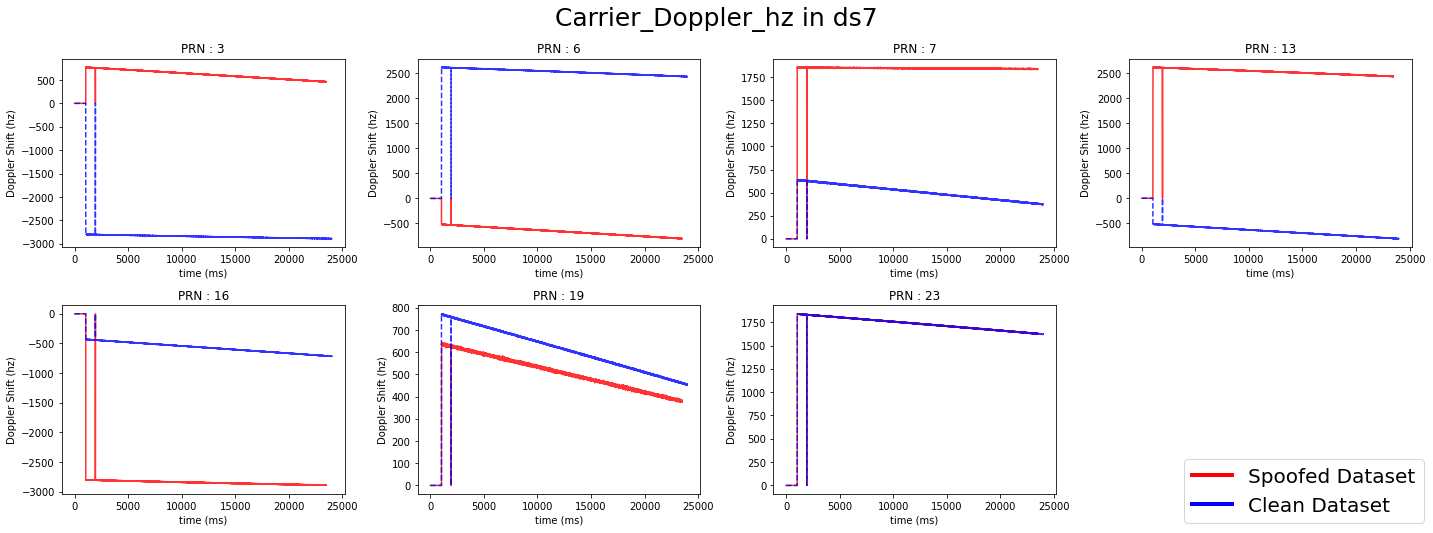

In [ ]:
compare_plot_all('ds7', 'Carrier_Doppler_hz', 'Doppler Shift (hz)')

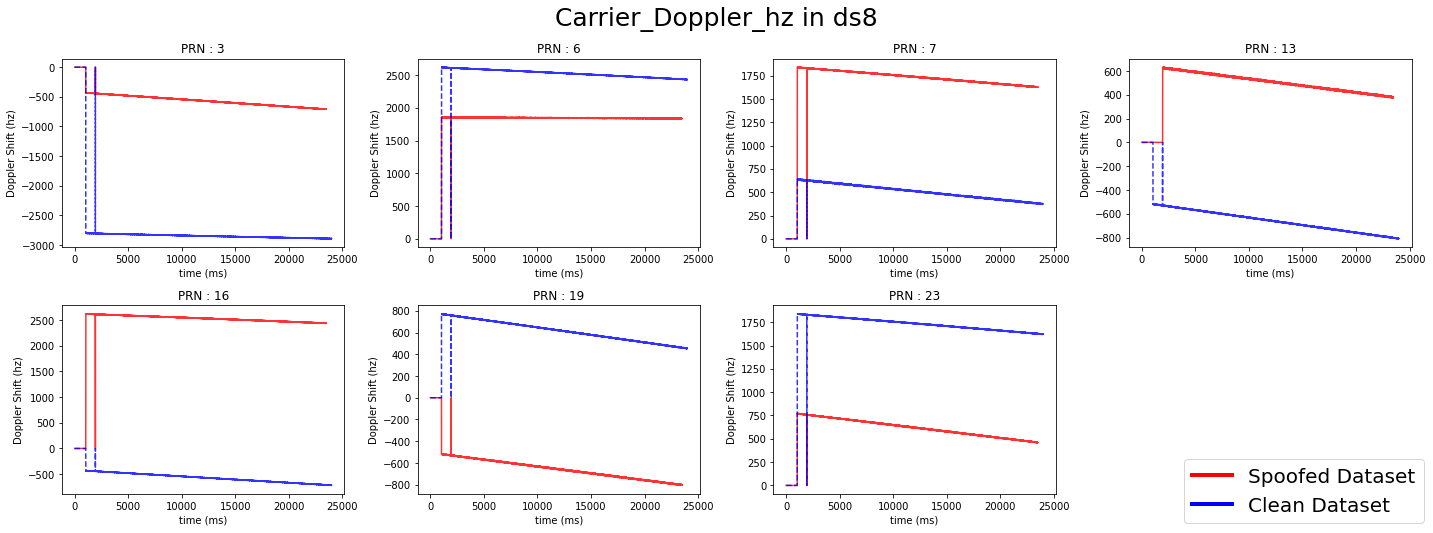

In [ ]:
compare_plot_all('ds8', 'Carrier_Doppler_hz', 'Doppler Shift (hz)')

### Pseudorange_m

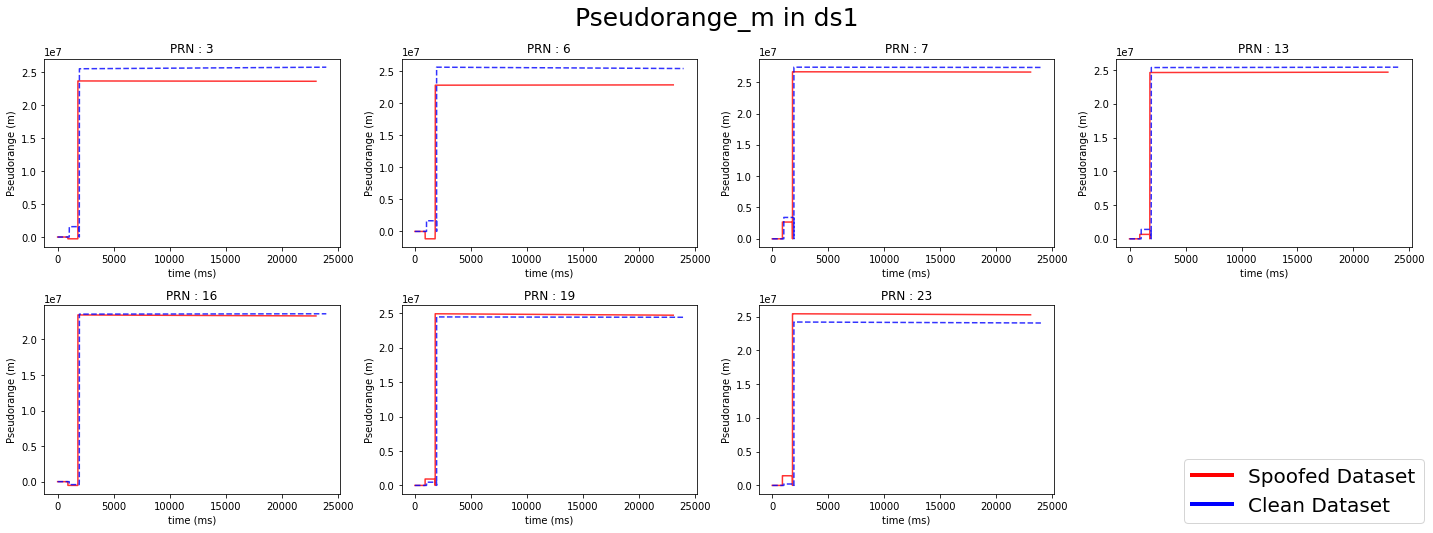

In [ ]:
compare_plot_all('ds1', 'Pseudorange_m', 'Pseudorange (m)')

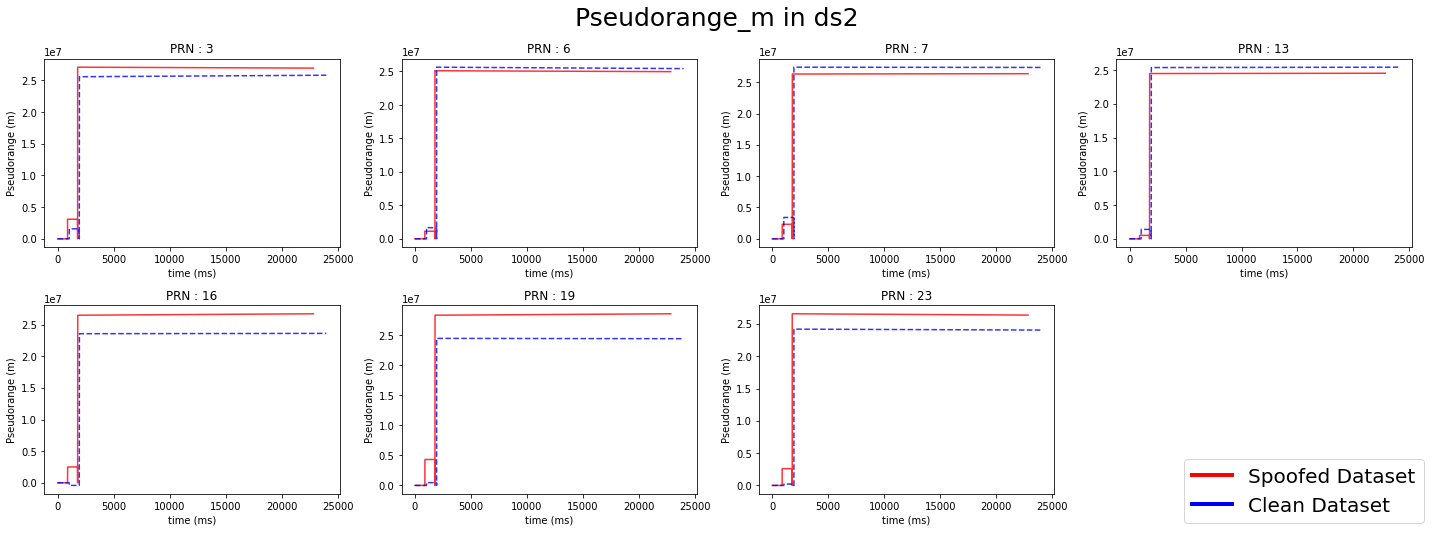

In [ ]:
compare_plot_all('ds2', 'Pseudorange_m', 'Pseudorange (m)')

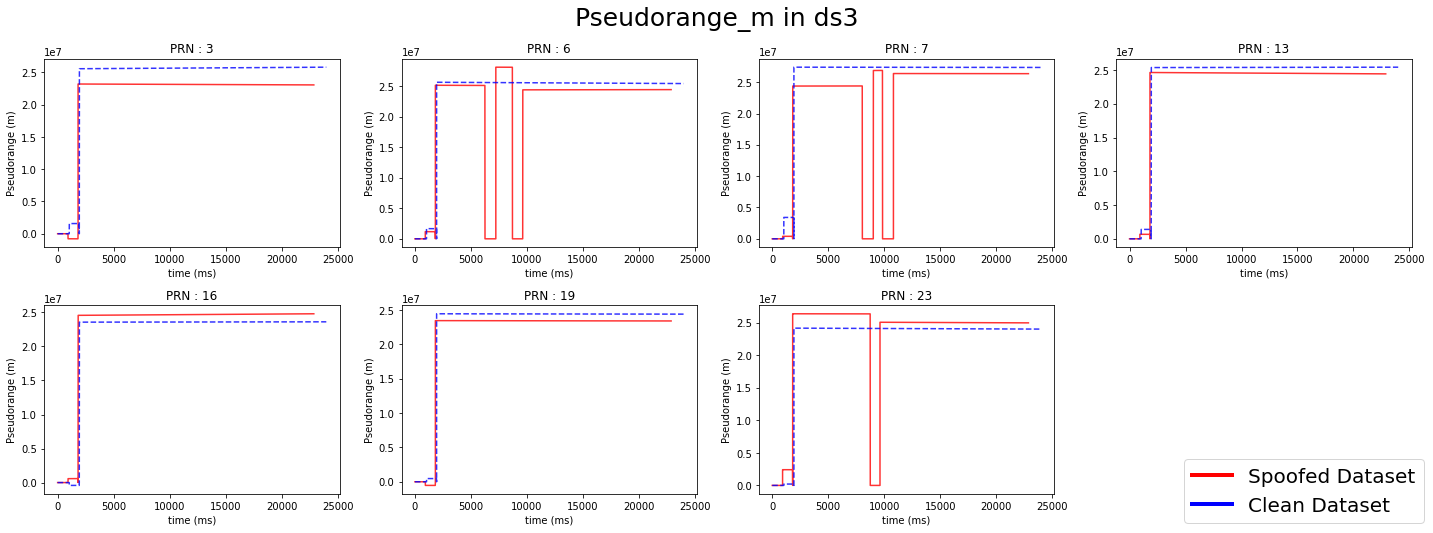

In [ ]:
compare_plot_all('ds3', 'Pseudorange_m', 'Pseudorange (m)')

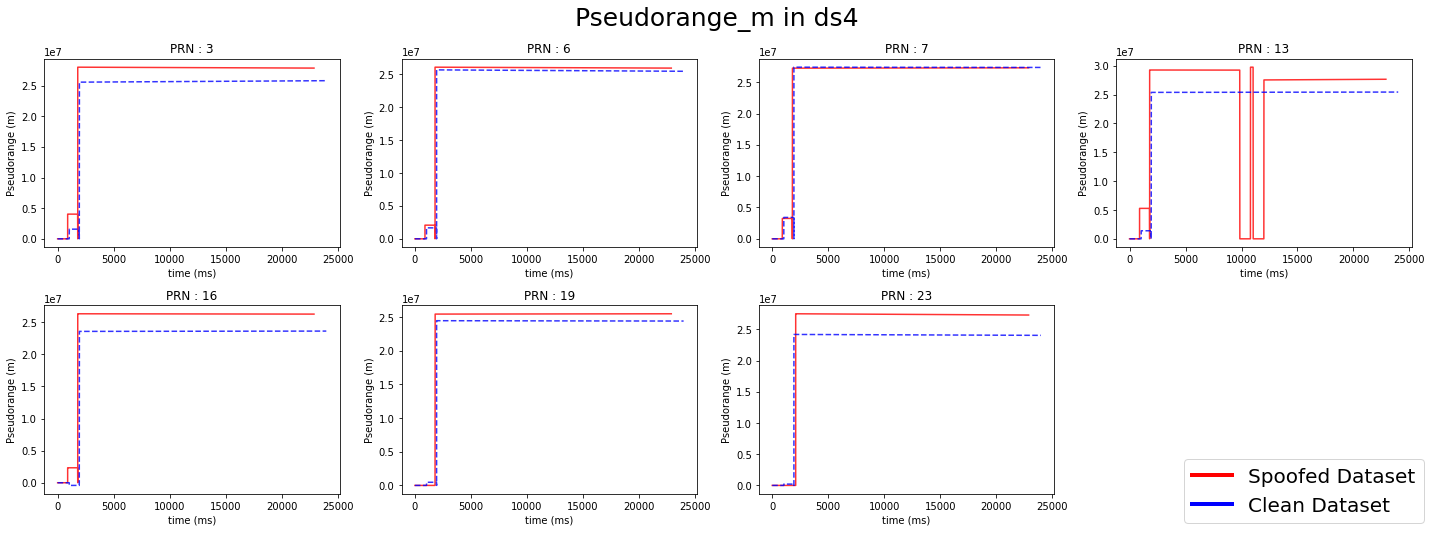

In [ ]:
compare_plot_all('ds4', 'Pseudorange_m', 'Pseudorange (m)')

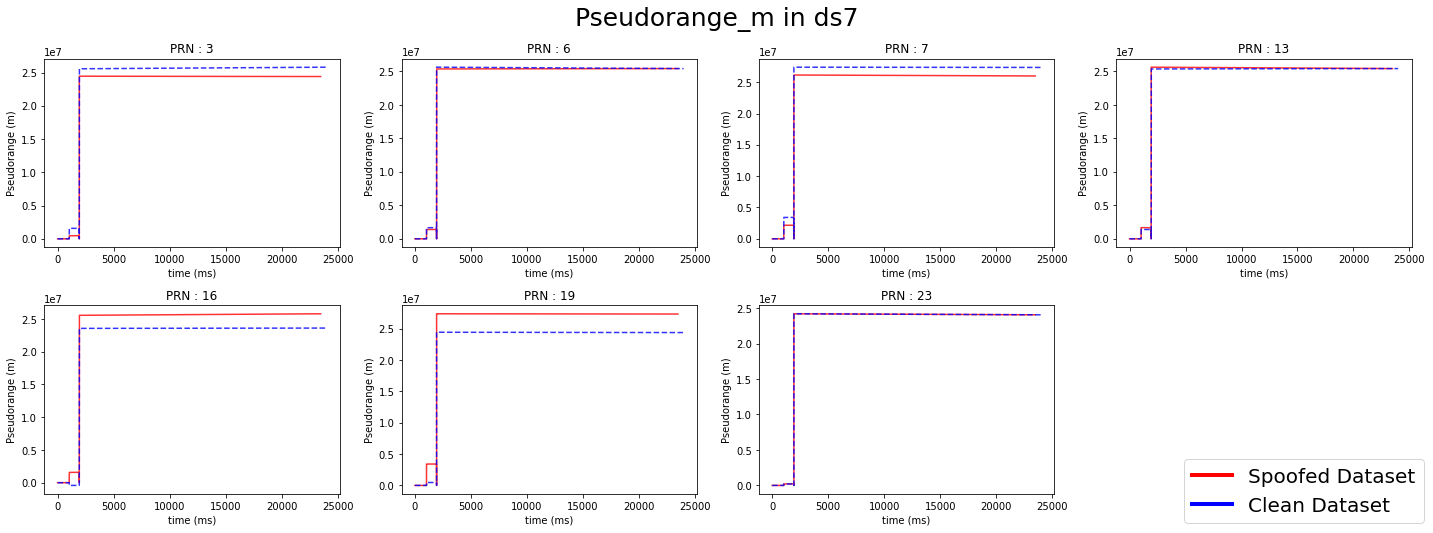

In [ ]:
compare_plot_all('ds7', 'Pseudorange_m', 'Pseudorange (m)')

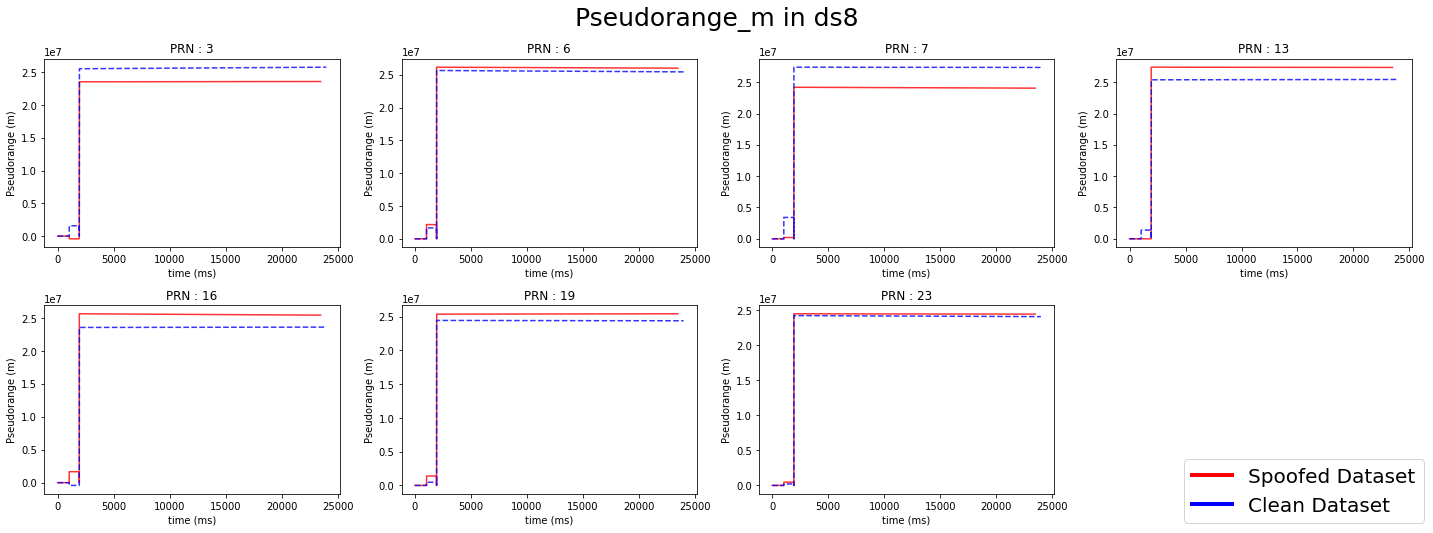

In [ ]:
compare_plot_all('ds8', 'Pseudorange_m', 'Pseudorange (m)')

## Tracking

### CN0_SNV_dB_Hz

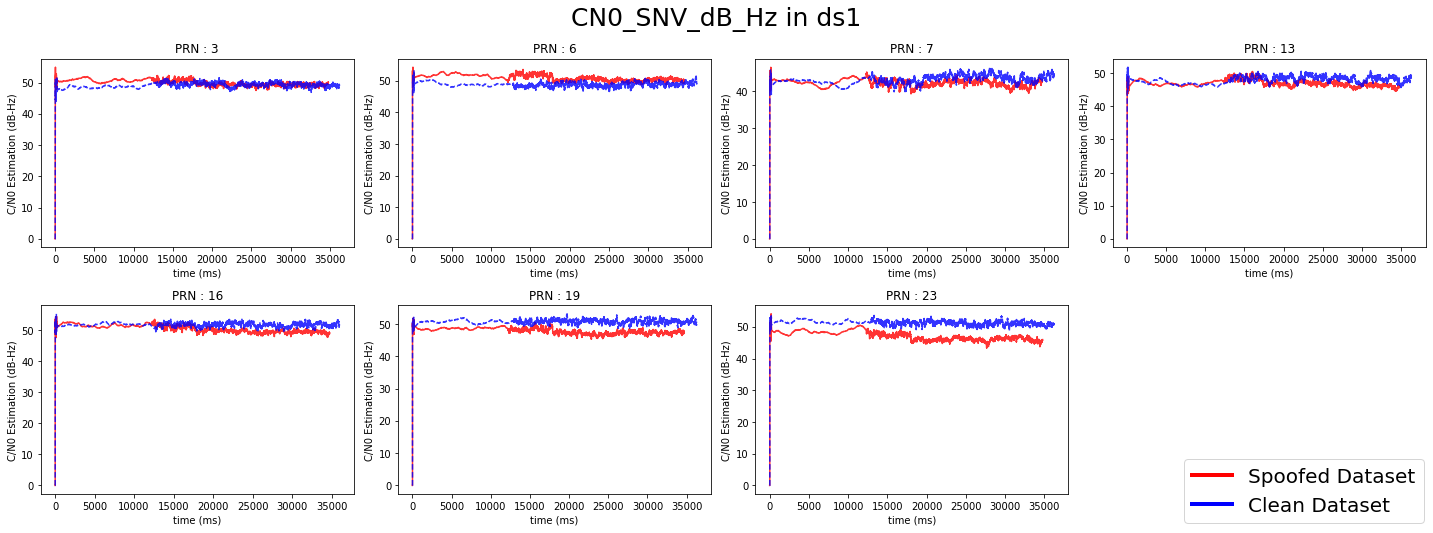

In [ ]:
compare_plot_all('ds1', 'CN0_SNV_dB_Hz', 'C/N0 Estimation (dB-Hz)')

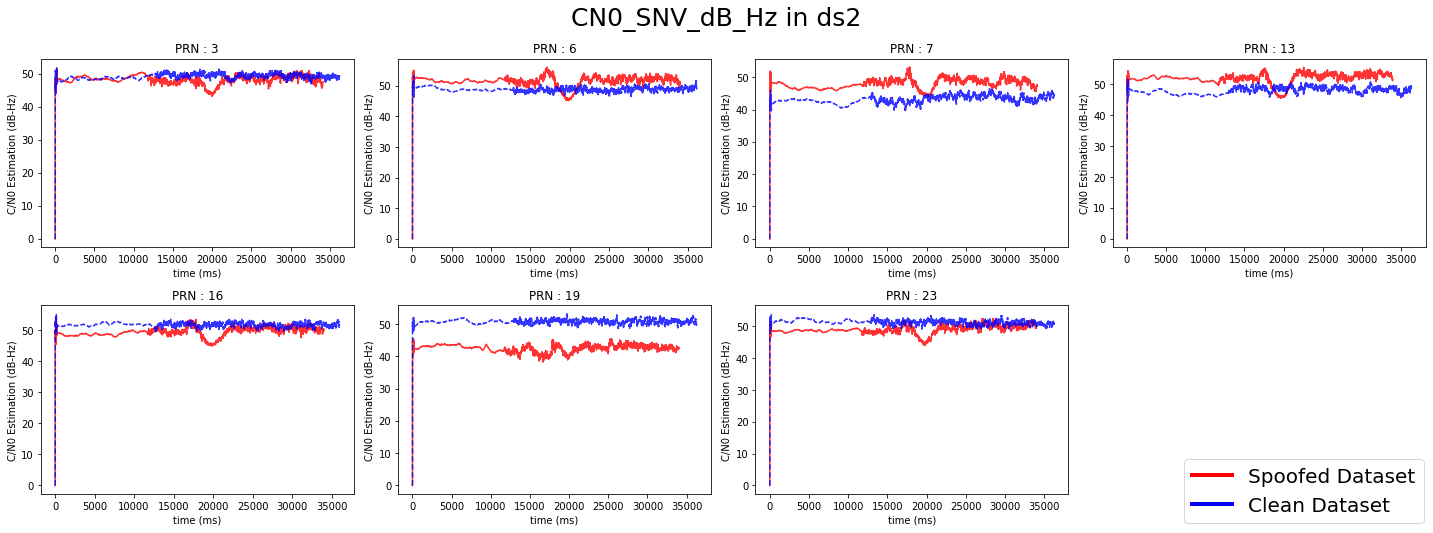

In [ ]:
compare_plot_all('ds2', 'CN0_SNV_dB_Hz', 'C/N0 Estimation (dB-Hz)')

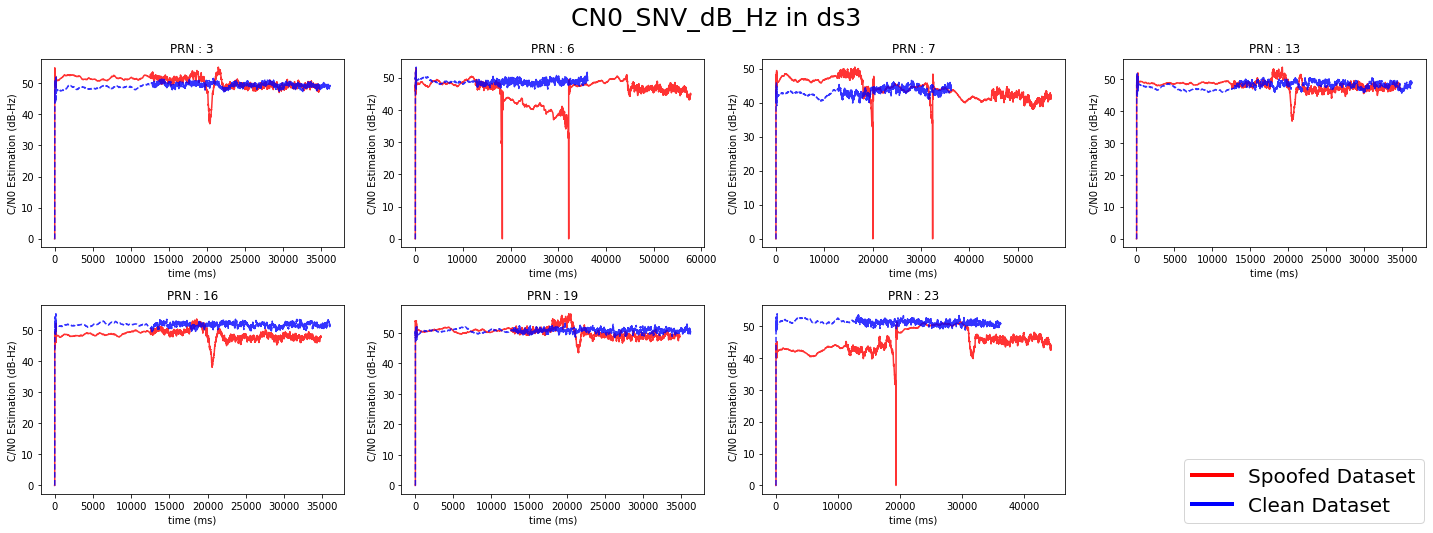

In [ ]:
compare_plot_all('ds3', 'CN0_SNV_dB_Hz', 'C/N0 Estimation (dB-Hz)')

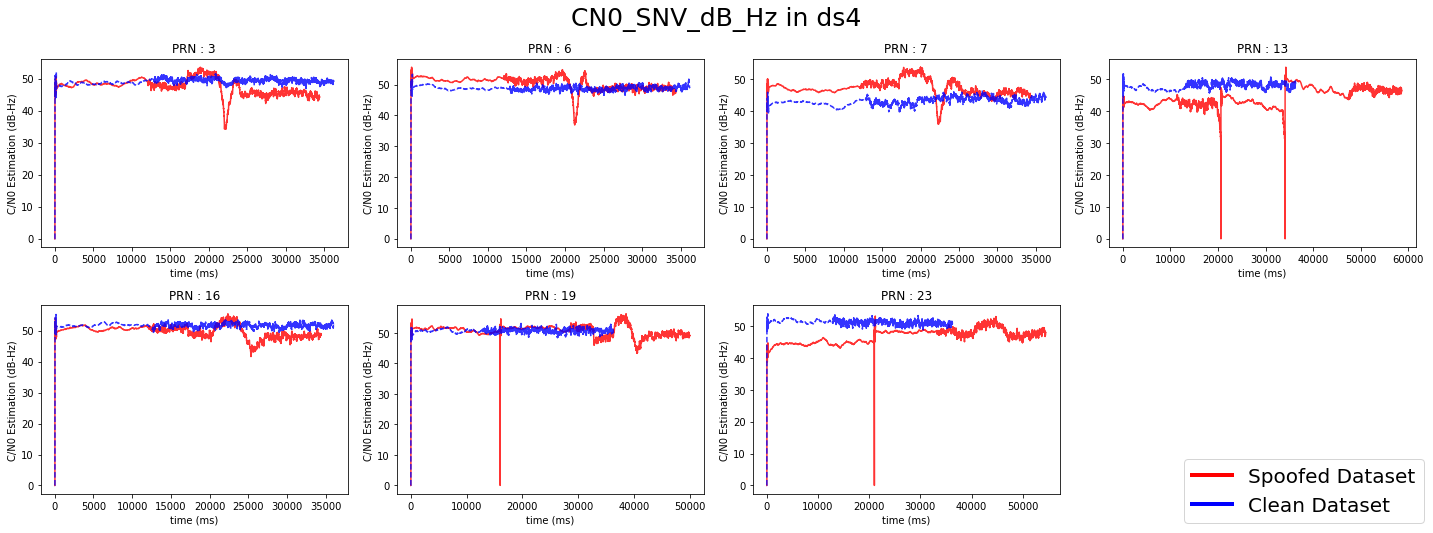

In [ ]:
compare_plot_all('ds4', 'CN0_SNV_dB_Hz', 'C/N0 Estimation (dB-Hz)')

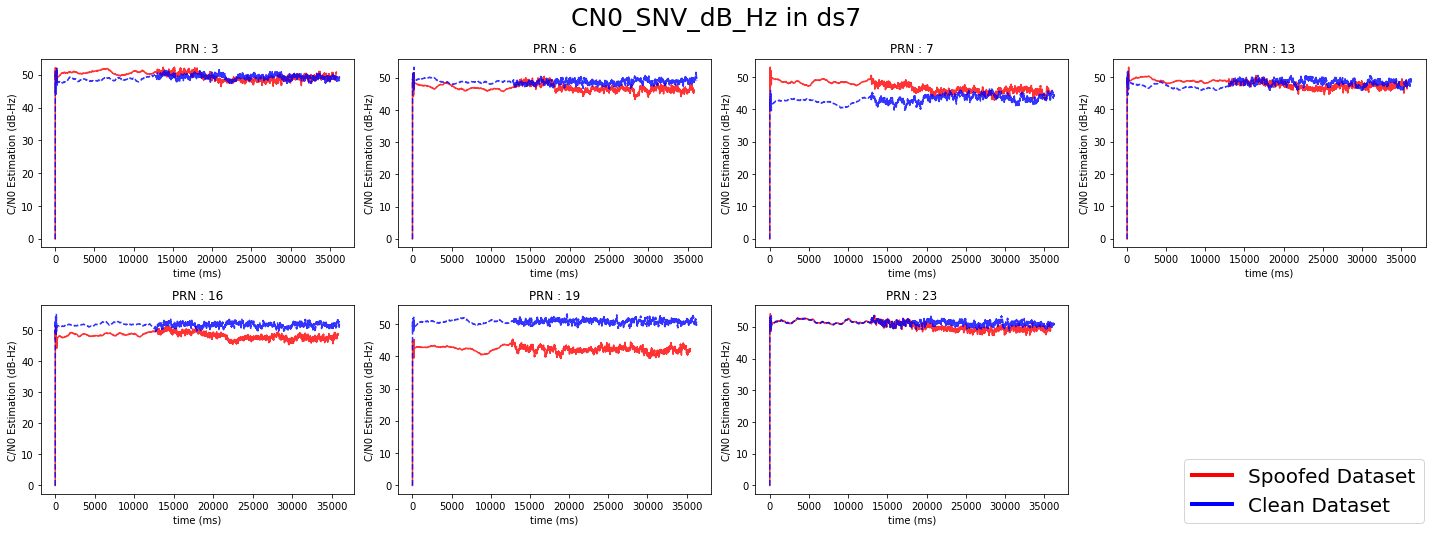

In [ ]:
compare_plot_all('ds7', 'CN0_SNV_dB_Hz', 'C/N0 Estimation (dB-Hz)')

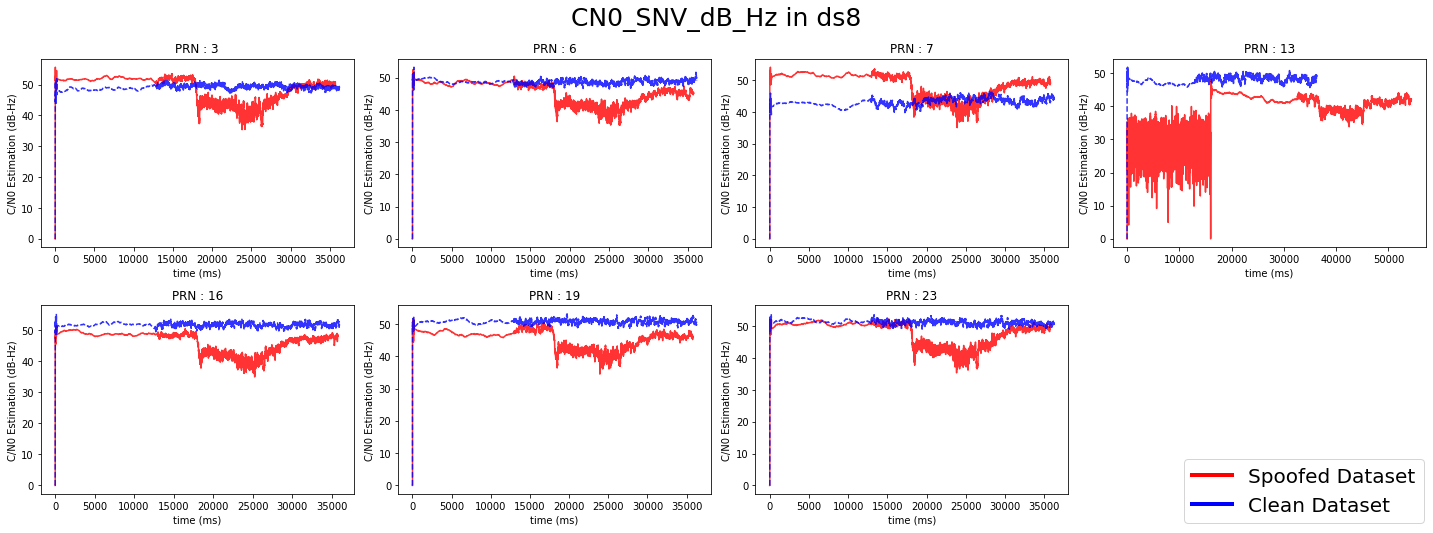

In [ ]:
compare_plot_all('ds8', 'CN0_SNV_dB_Hz', 'C/N0 Estimation (dB-Hz)')

### TRACKINGS : ['CN0_SNV_dB_Hz', 'PRN', 'PRN_start_sample_count', 'Prompt_I', 'Prompt_Q', 'abs_E', 'abs_L', 'abs_P', 'abs_VE', 'abs_VL', 'acc_carrier_phase_rad', 'aux1', 'aux2', 'carr_error_filt_hz', 'carr_error_hz', 'carrier_doppler_hz', 'carrier_doppler_rate_hz', 'carrier_lock_test', 'code_error_chips', 'code_error_filt_chips', 'code_freq_chips', 'code_freq_rate_chips']

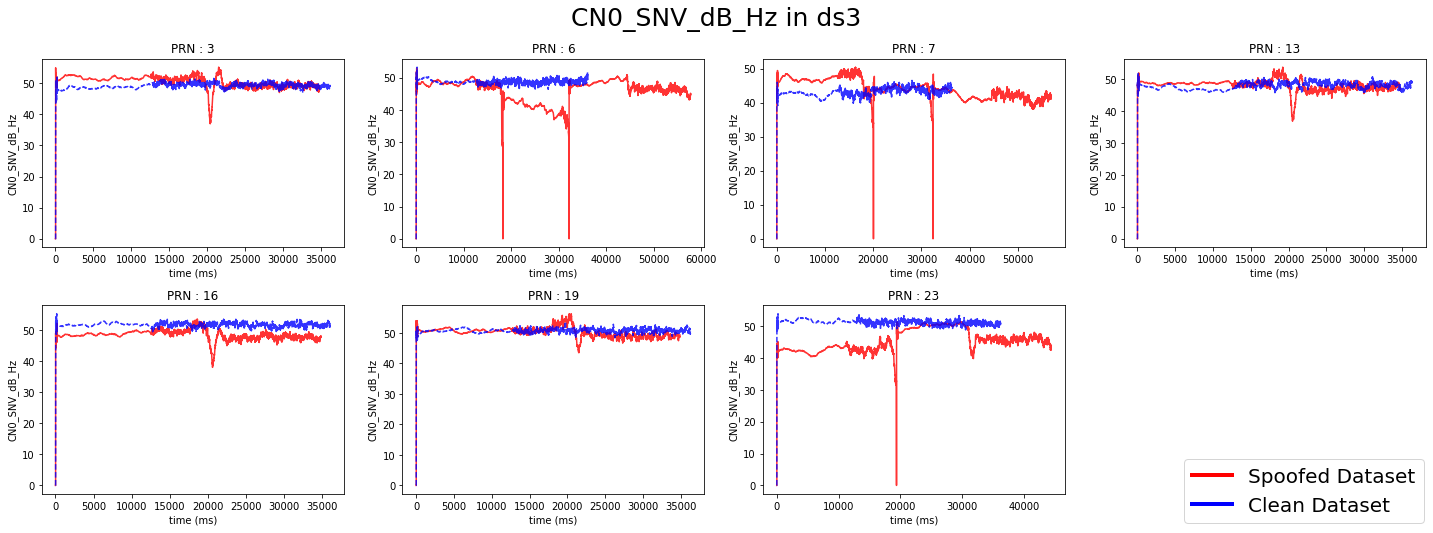

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[0], list(ds1_trk0_mat.keys())[0]) ## THIS!! ## Real!!

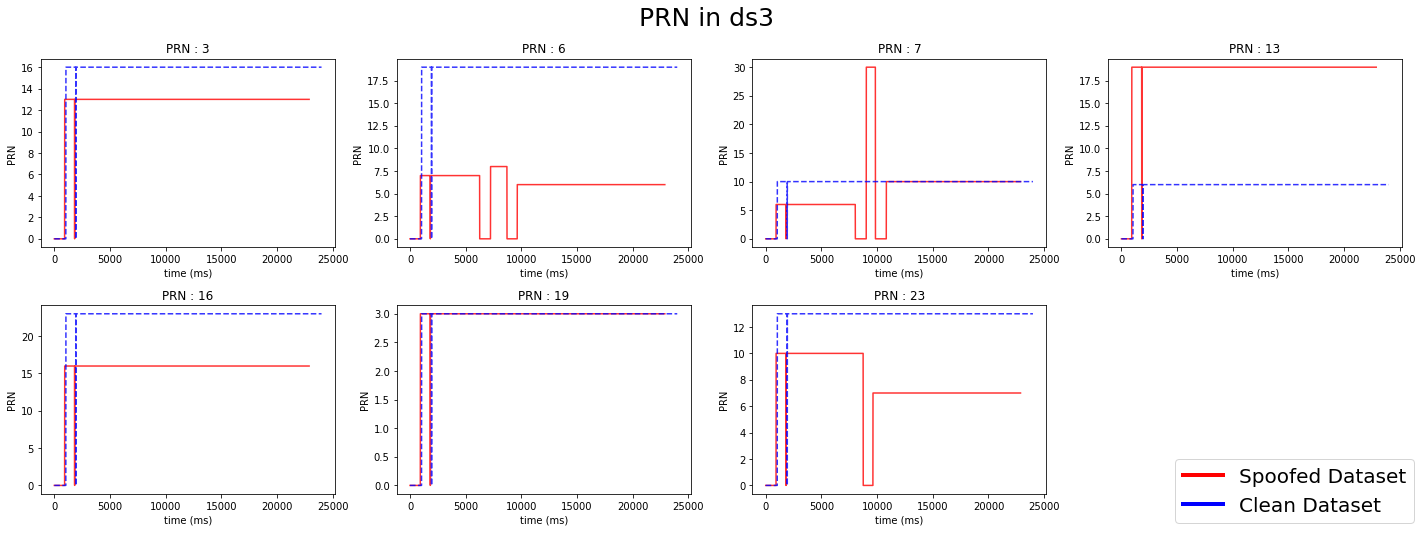

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[1], list(ds1_trk0_mat.keys())[1])

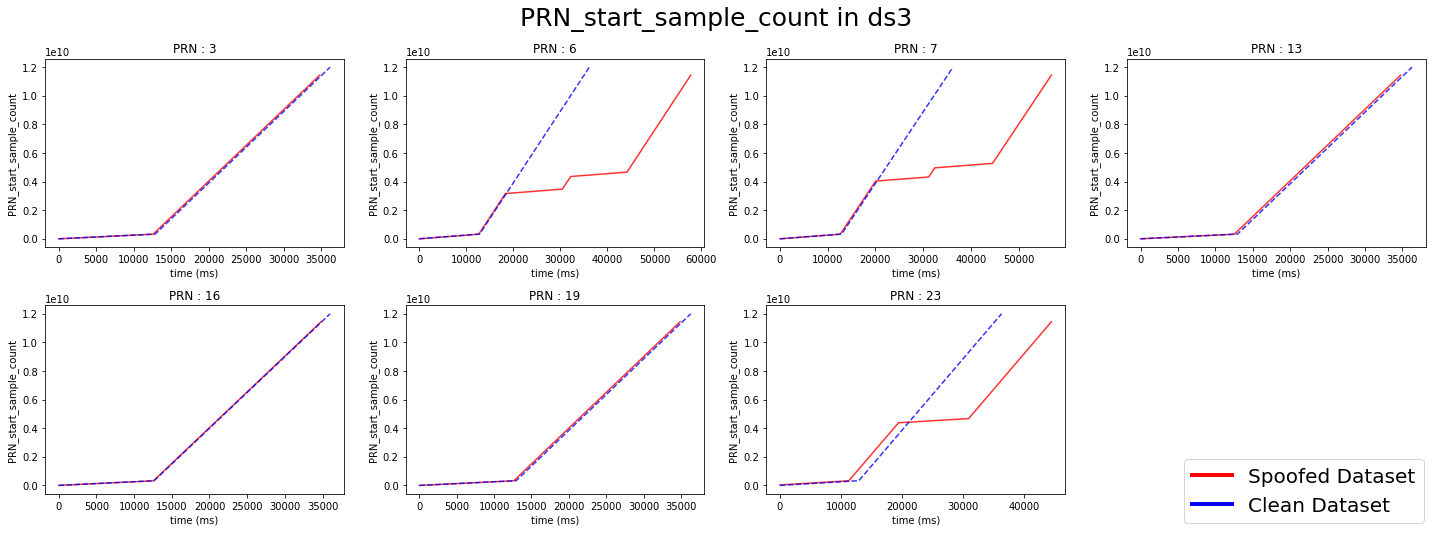

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[2], list(ds1_trk0_mat.keys())[2])

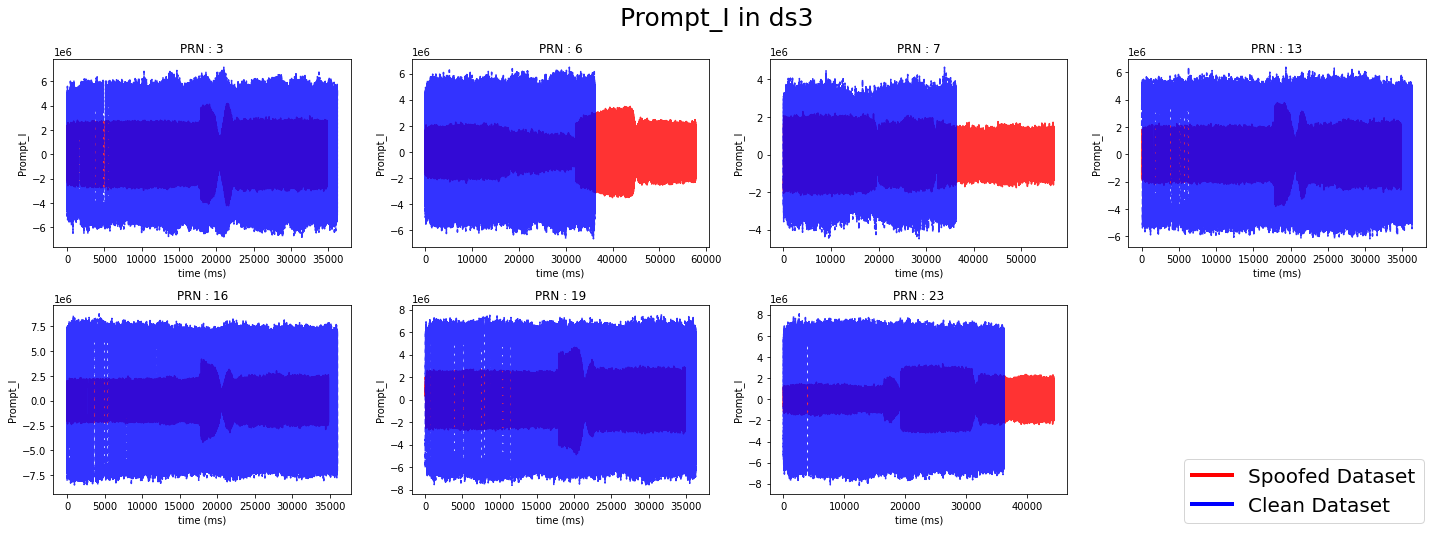

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[3], list(ds1_trk0_mat.keys())[3]) ## THIS!! ## Real!!

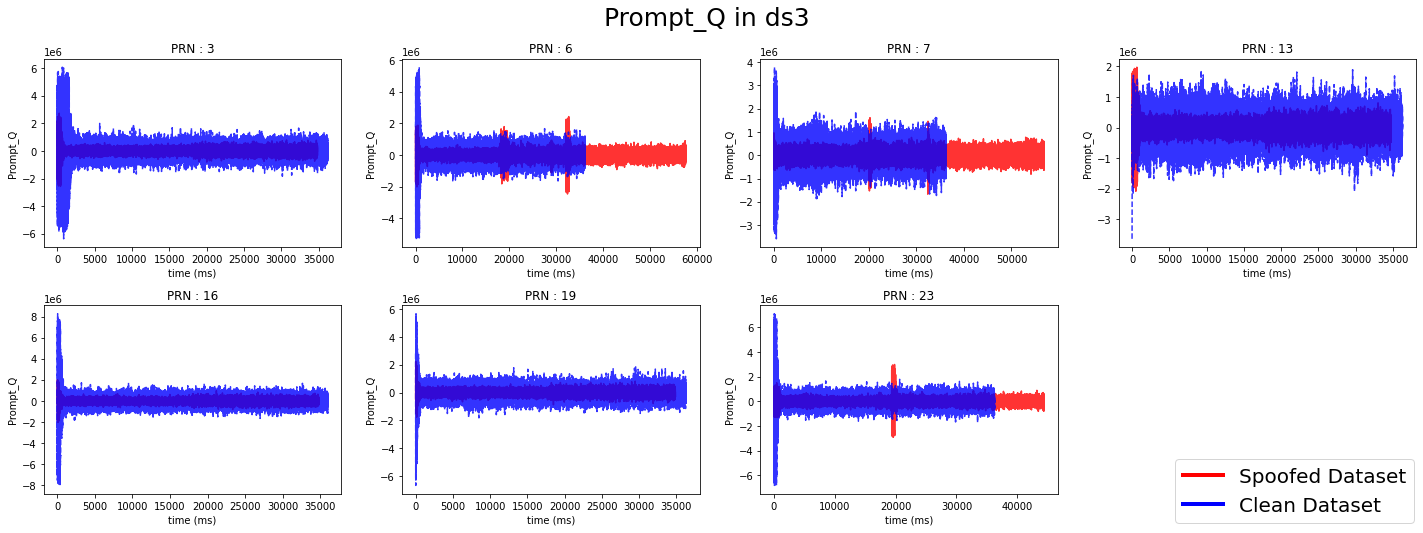

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[4], list(ds1_trk0_mat.keys())[4]) ## THIS!! ## Real!!

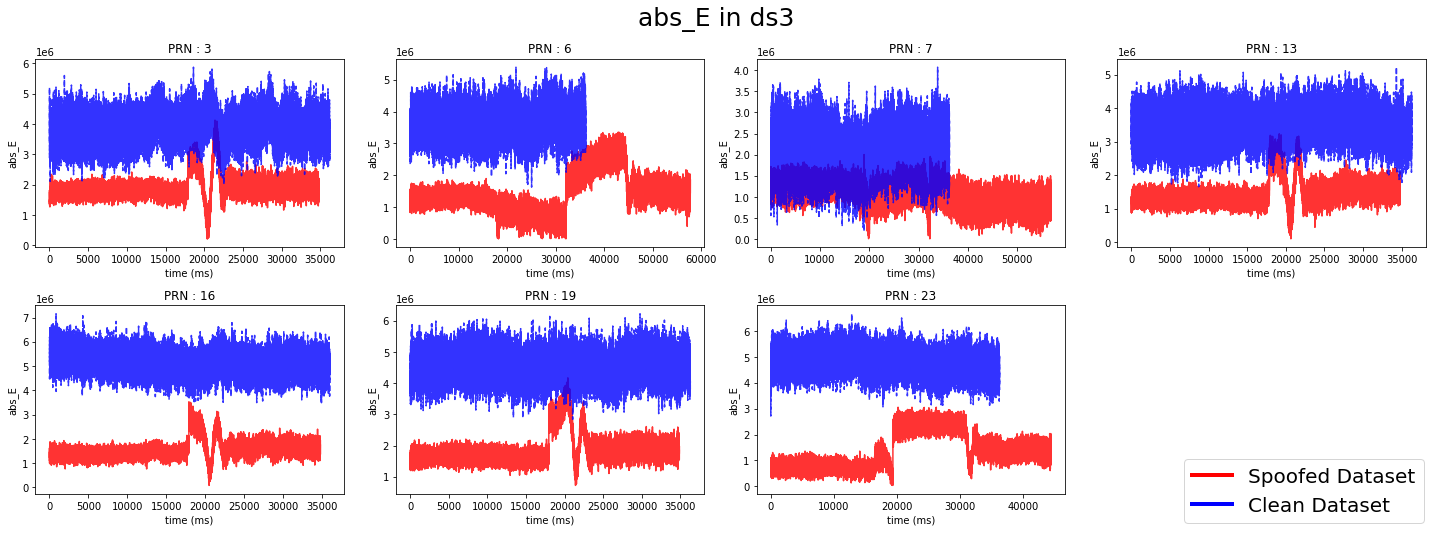

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[5], list(ds1_trk0_mat.keys())[5]) ## THIS!! ## Real!!

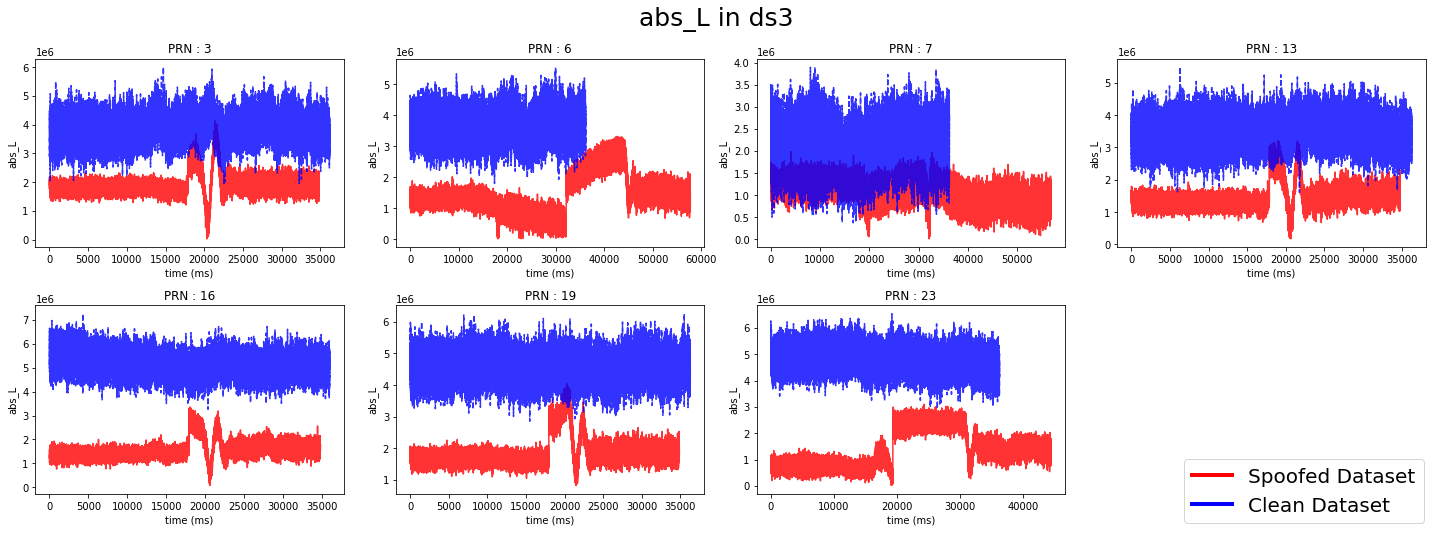

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[6], list(ds1_trk0_mat.keys())[6]) ## THIS!!

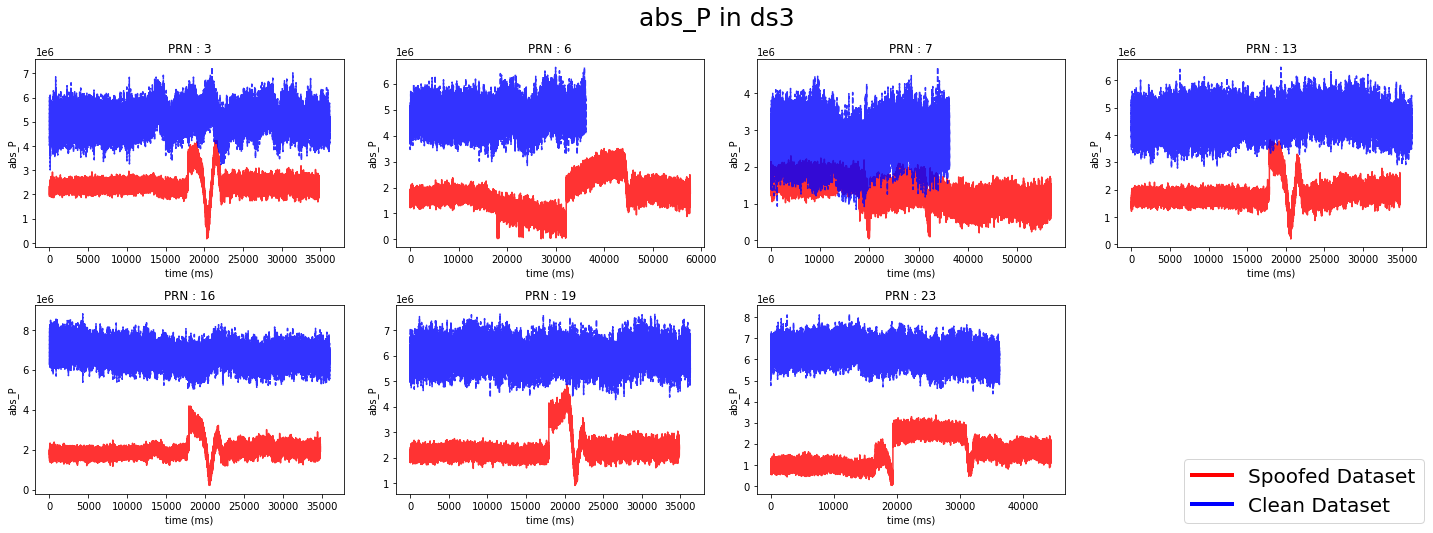

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[7], list(ds1_trk0_mat.keys())[7]) ## THIS!!

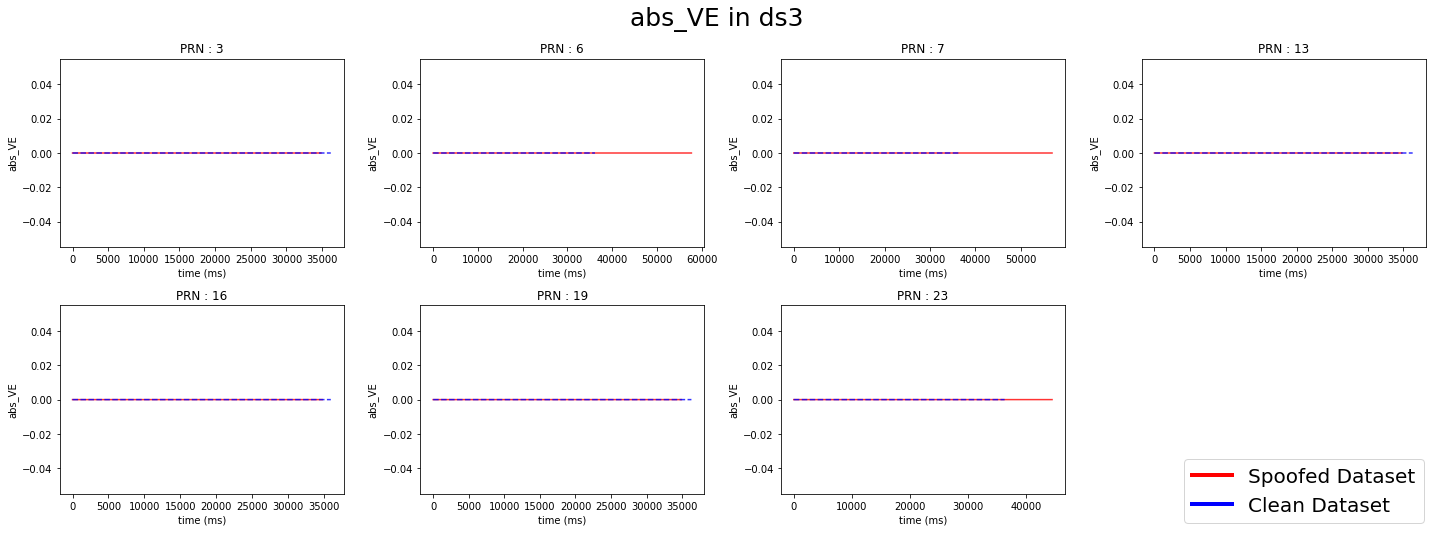

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[8], list(ds1_trk0_mat.keys())[8])

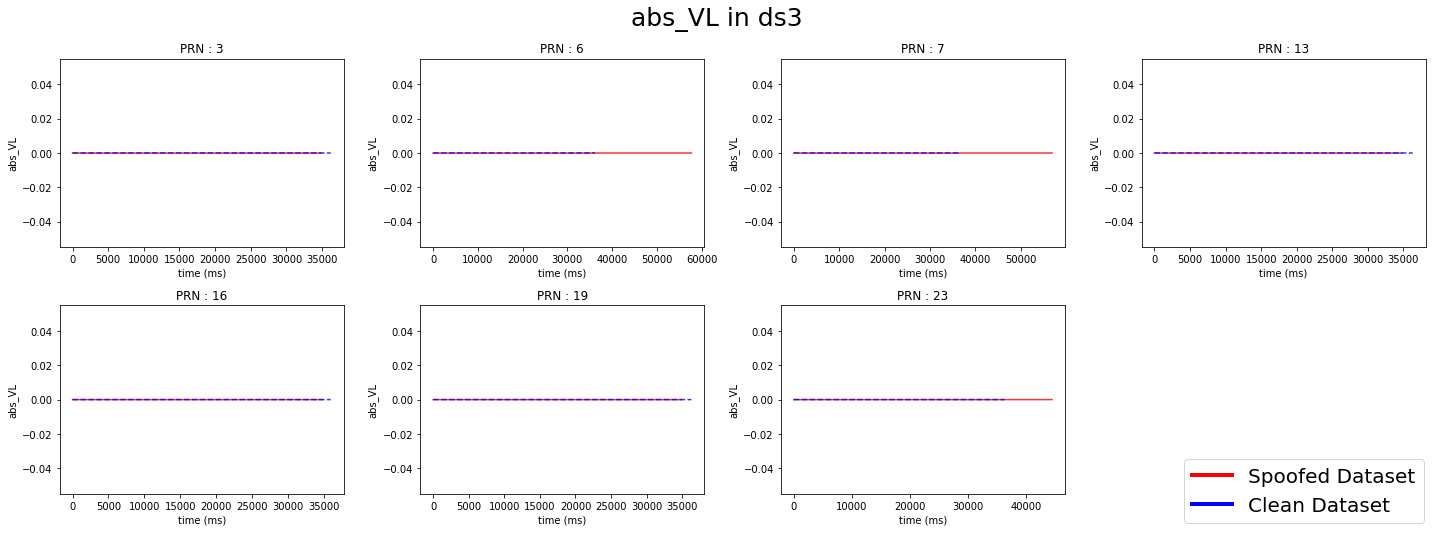

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[9], list(ds1_trk0_mat.keys())[9])

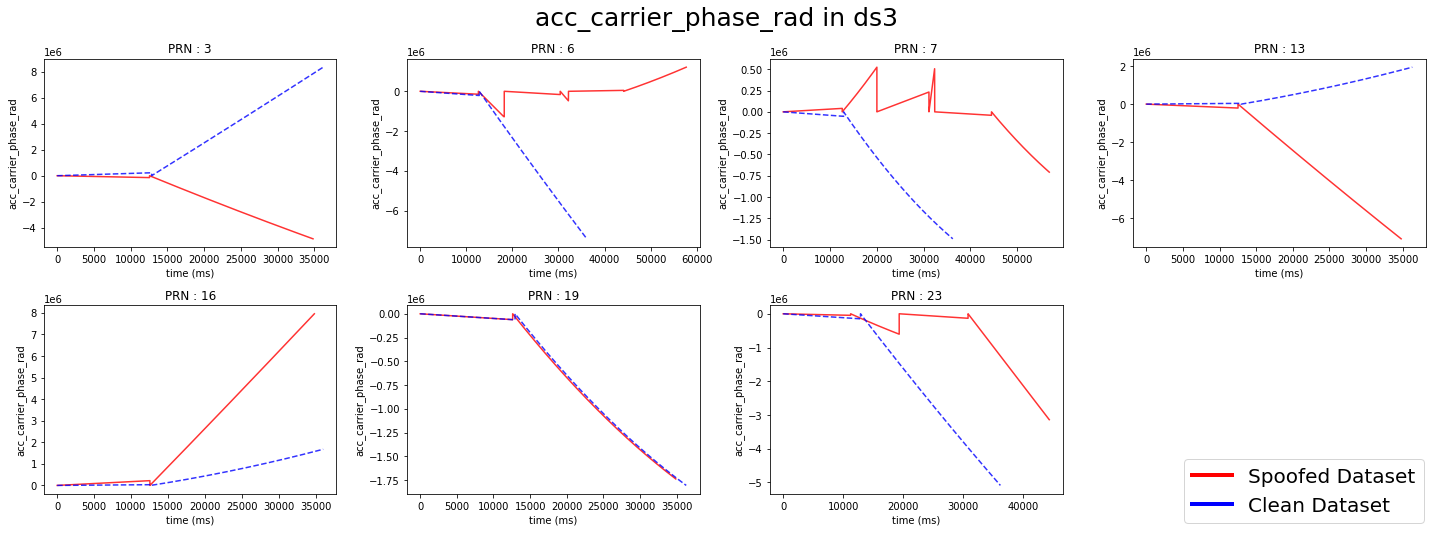

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[10], list(ds1_trk0_mat.keys())[10])

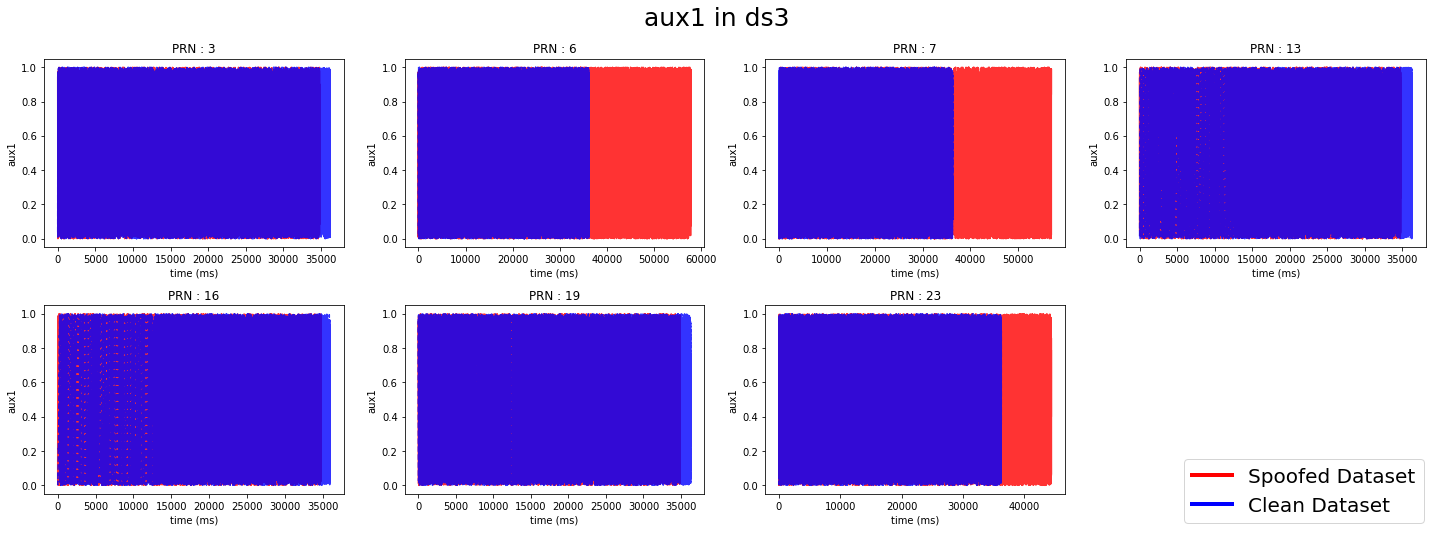

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[11], list(ds1_trk0_mat.keys())[11])

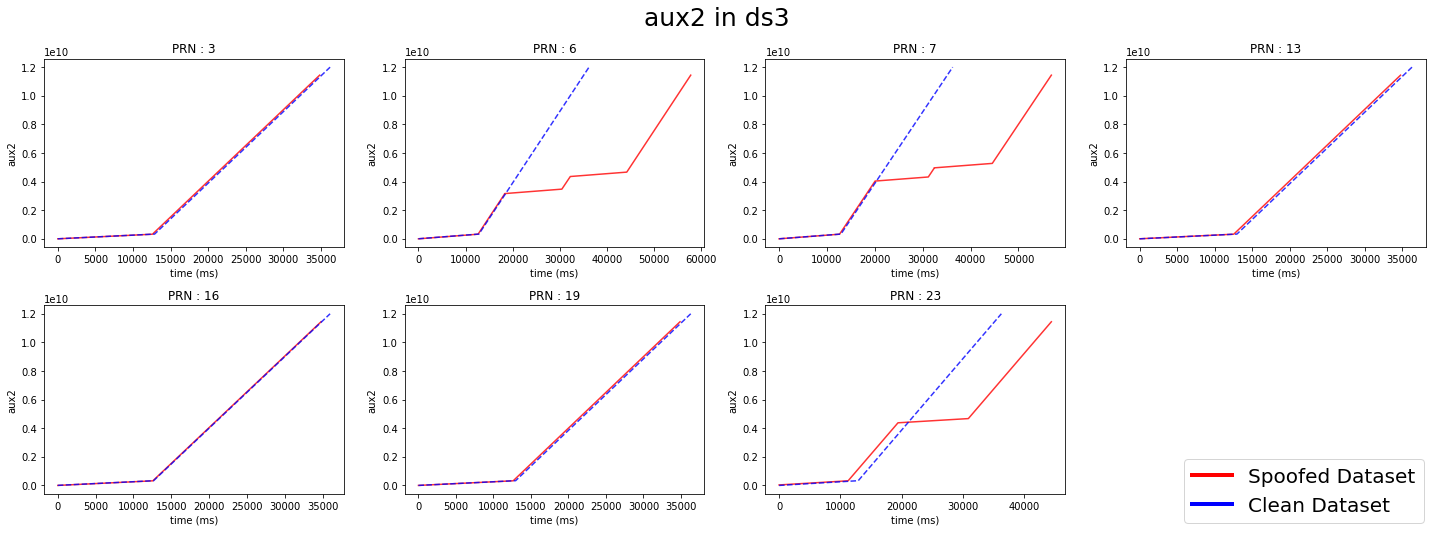

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[12], list(ds1_trk0_mat.keys())[12])

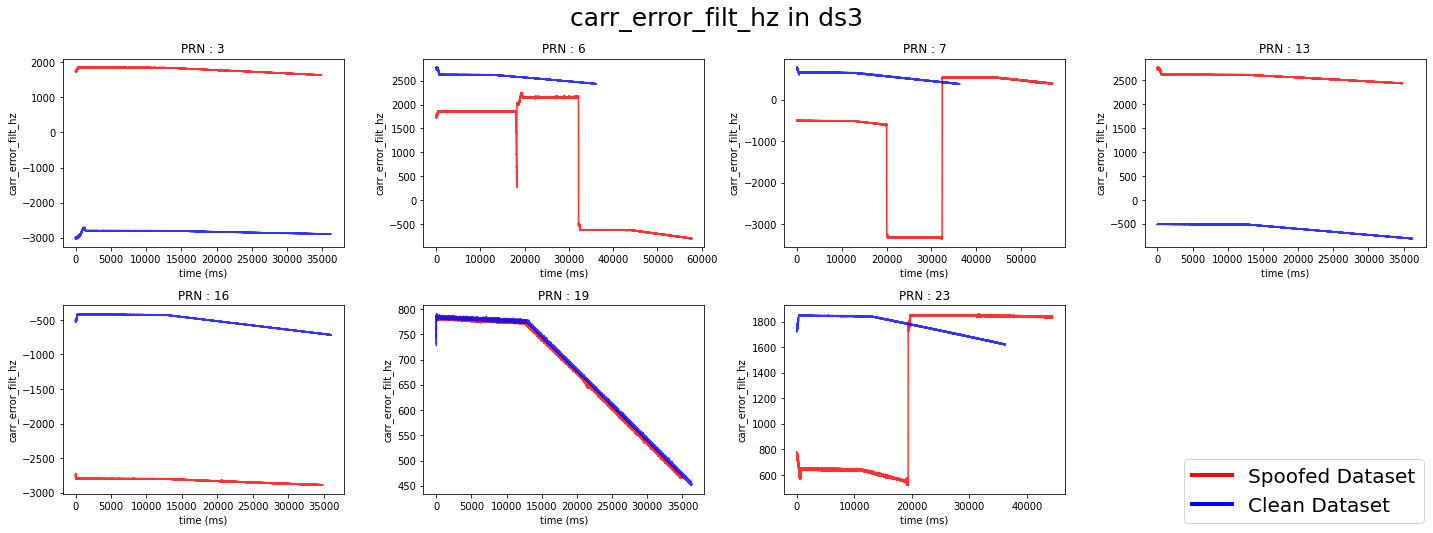

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[13], list(ds1_trk0_mat.keys())[13]) ## THIS!!

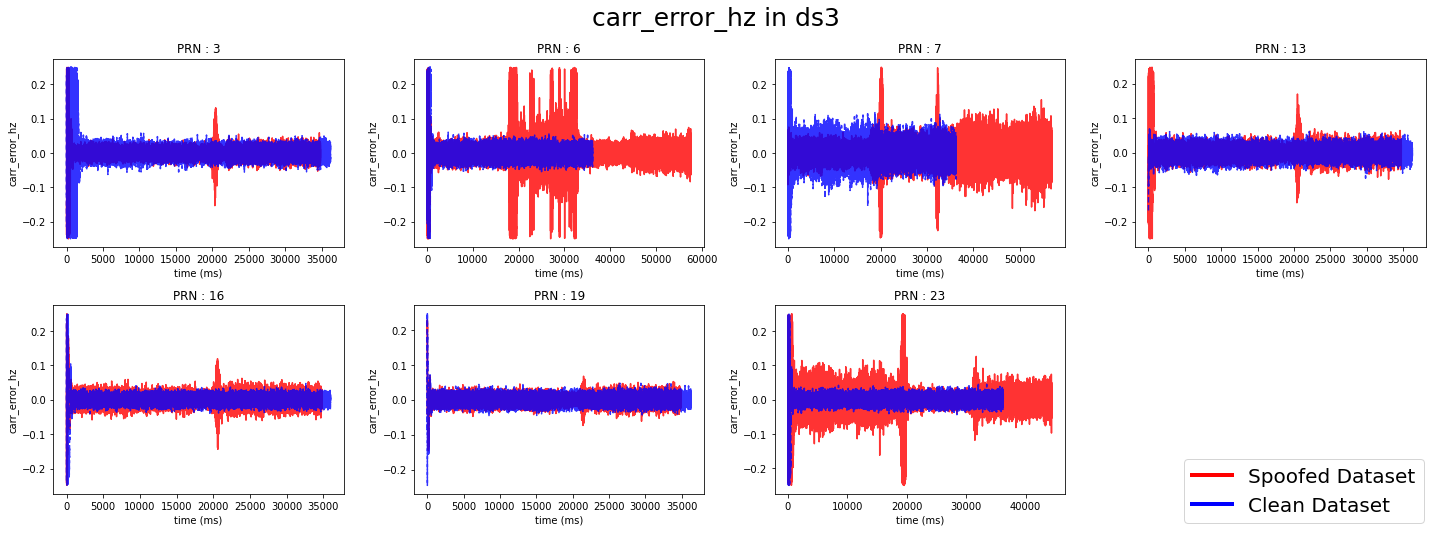

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[14], list(ds1_trk0_mat.keys())[14]) ## THIS!! ## Real!!

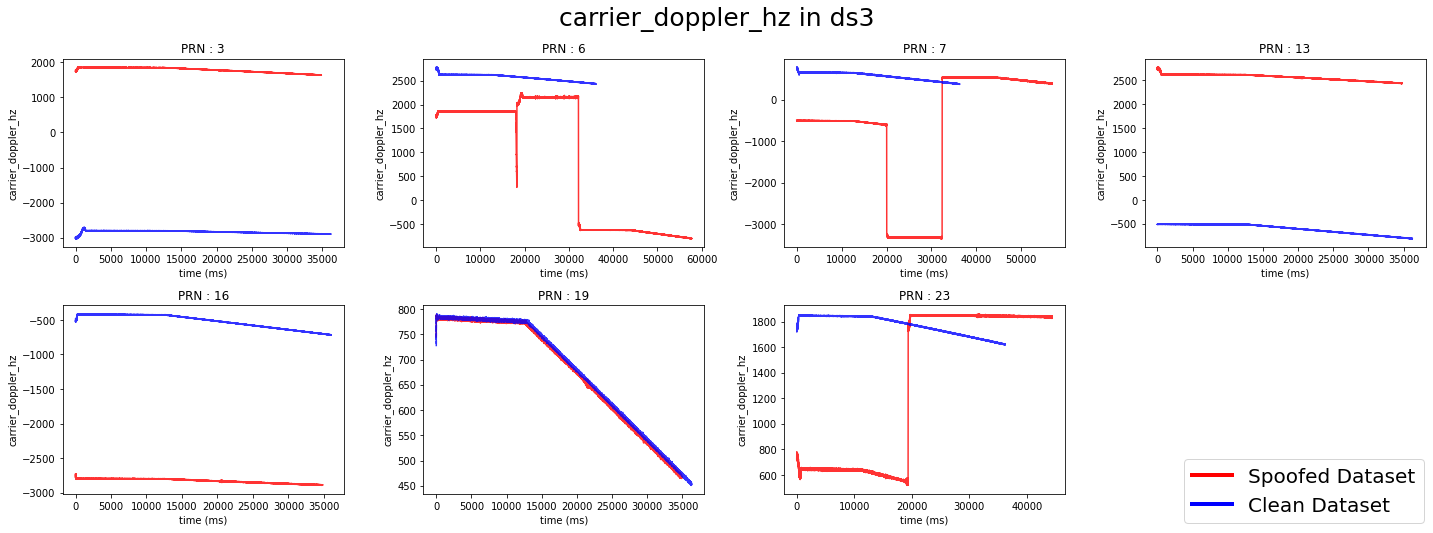

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[15], list(ds1_trk0_mat.keys())[15])

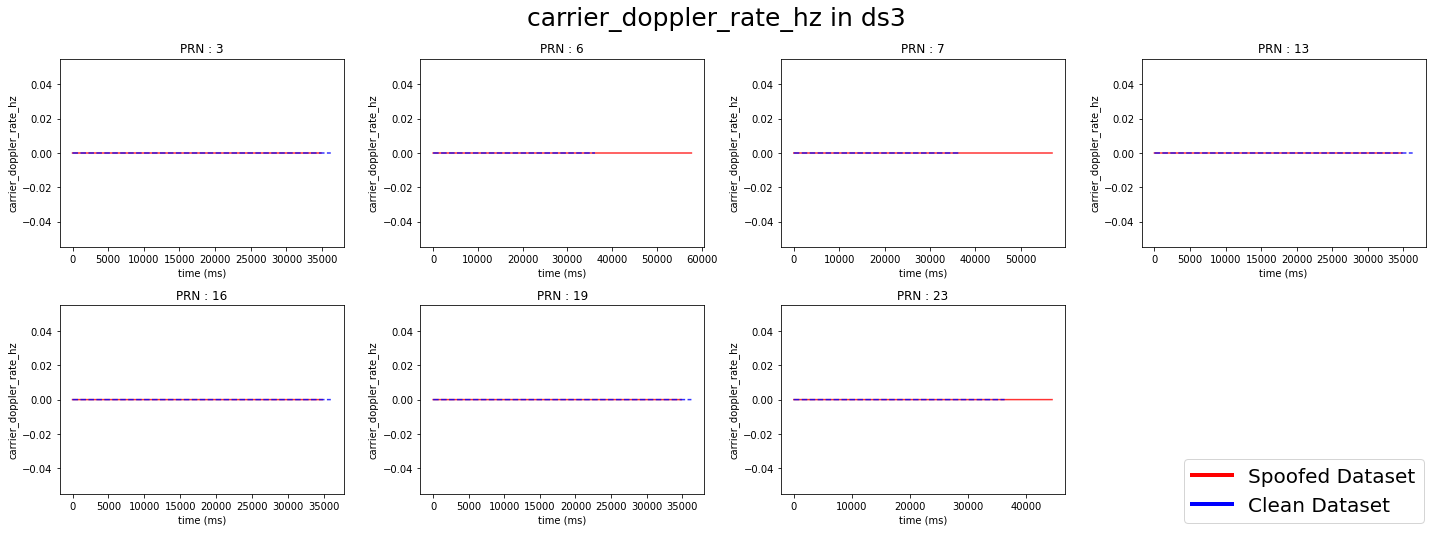

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[16], list(ds1_trk0_mat.keys())[16])

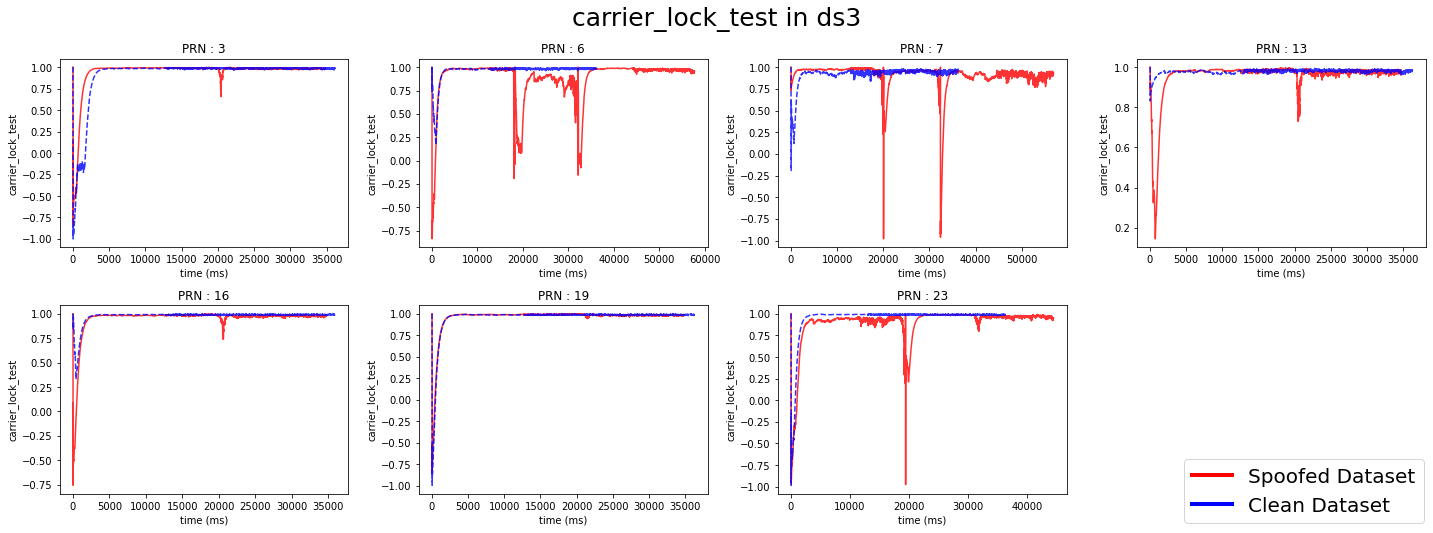

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[17], list(ds1_trk0_mat.keys())[17]) ## THIS!! ## Real!!

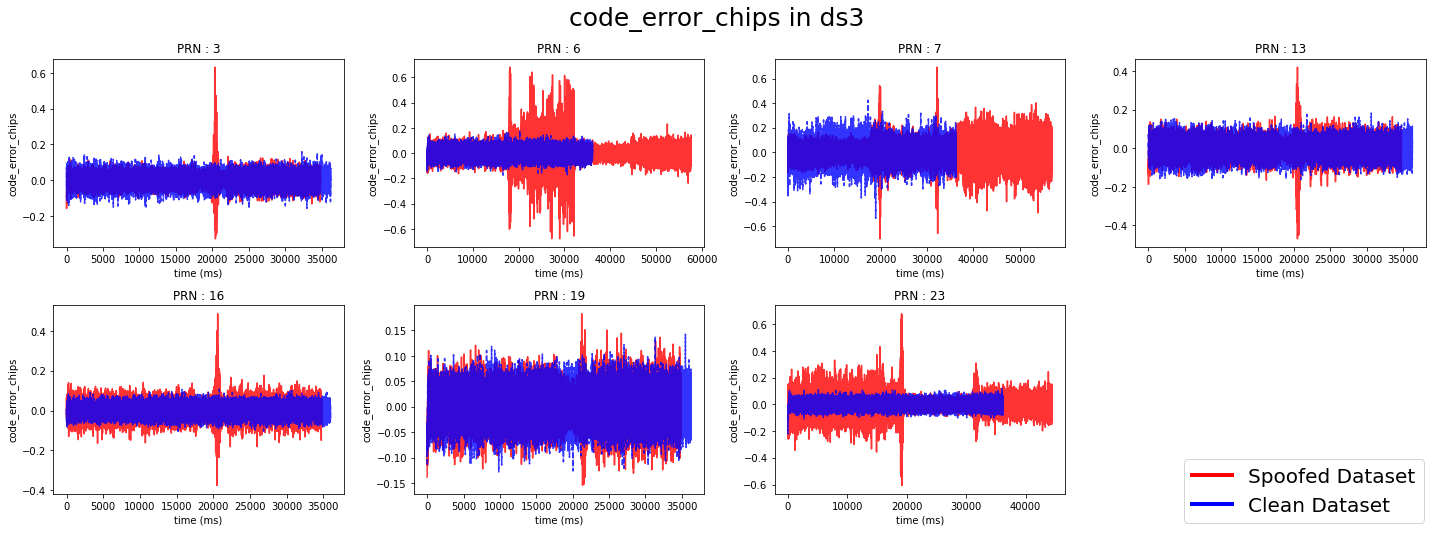

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[18], list(ds1_trk0_mat.keys())[18]) ## THIS!! ## Real!!

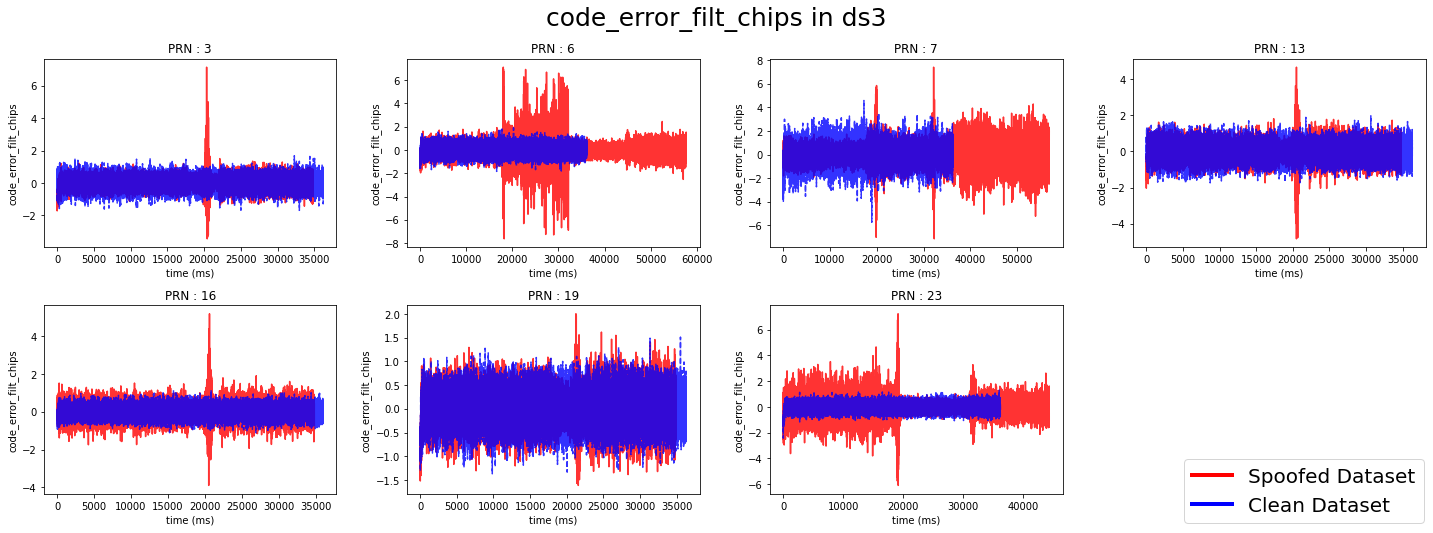

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[19], list(ds1_trk0_mat.keys())[19]) ## THIS!!

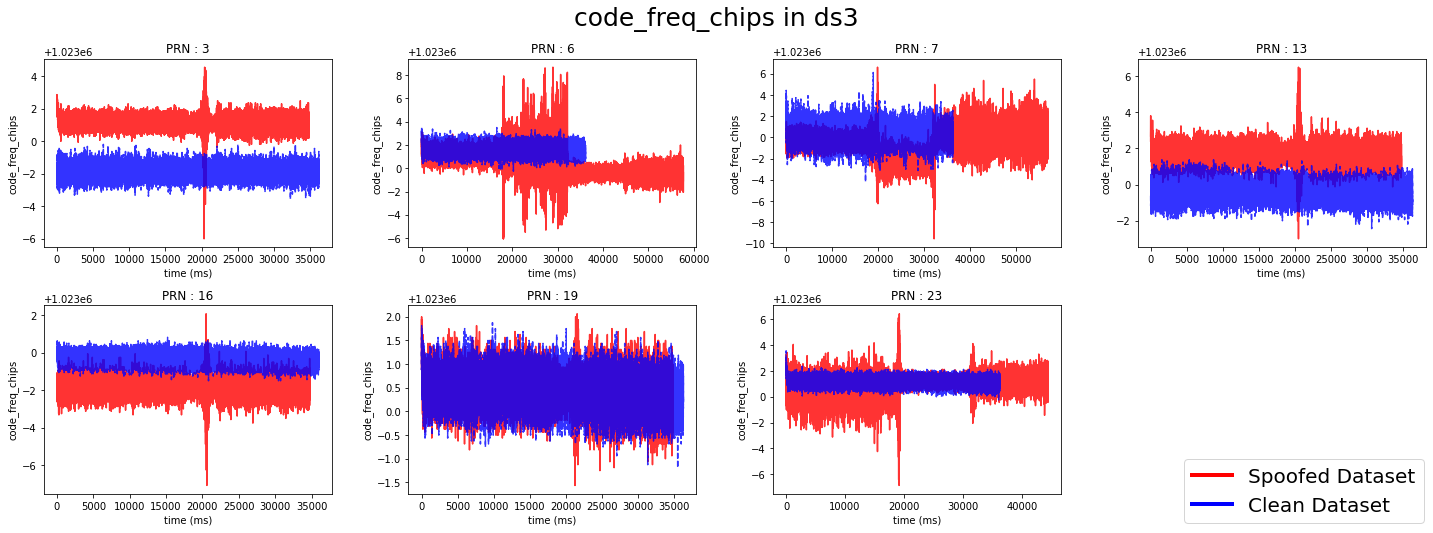

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[20], list(ds1_trk0_mat.keys())[20]) ## THIS!! ## Real!!

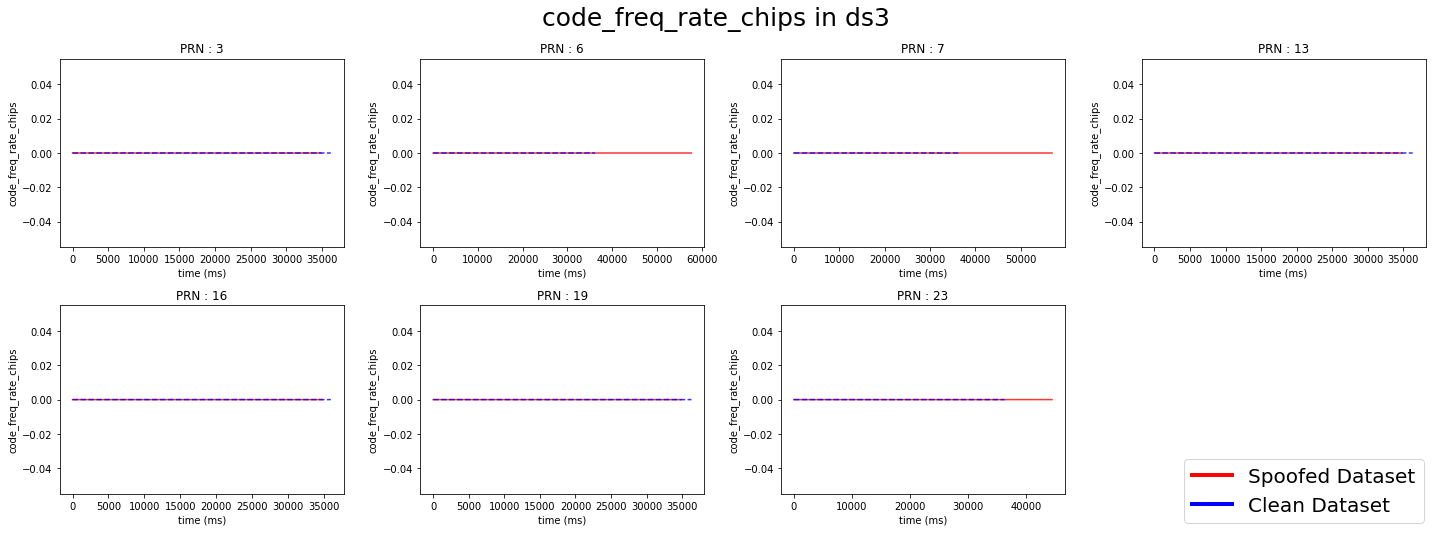

In [ ]:
compare_plot_all('ds3', list(ds1_trk0_mat.keys())[21], list(ds1_trk0_mat.keys())[21])